In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pandas.api.types import CategoricalDtype
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

## Load and Clean Census Data

In [5]:
# Read the census data
census_df = pd.read_csv("../../data/census/census_zipcode_level.csv")
census_df.head()

,Zip,State,Population,White,Black,Native,Asian,Islander,Other,Two,Hispanic,Female_0to9_Years,Female_10to19_Years,Female_20to29_Years,Female_30to39_Years,Female_40to49_Years,Female_50to59_Years,Female_60to69_Years,Female_70p_Years,Male_0to9_Years,Male_10to19_Years,Male_20to29_Years,Male_30to39_Years,Male_40to49_Years,Male_50to59_Years,Male_60to69_Years,Male_70p_Years,Median_household_inc,Households,Less_than_24999,From_25000_to_49999,From_50000_to_74999,From_75000_to_99999,From_100000_to_149999,From_150000_to_199999,From_200000_or_more,Population_25_Years_and_Over,No_Diploma_pct,High_School_pct,Some_College_pct,Bachelors_Degree_pct,Graduate_Degree_pct,Family_Households,Family_Poverty_pct,labor_over_16_years,Unemployment_Rate_pct,Housing_Units,Households.1,Families,Married_couple_families,Married_couple_child_under_18,Married_couple_no_child_under_18,Single_parent_families,Single_parent_child_under_18,Single_parent_no_child_under_18,Non_families,Househoulder_living_alone,Householder_living_with_unrelated
0,35004,Alabama,10418,8495,1657,0,198,0,0,42,26,531,507,666,822,632,810,741,565,777,760,798,780,495,705,495,334,61371,4225,626,920,1218,574,665,171,51,7177,6.7,29.6,42.2,14.3,7.2,3031,5.9,5930,4.9,4317,4225,3031,2265,820,1445,766,351,415,1194,1090,104
1,35005,Alabama,7708,4432,3130,2,0,2,0,26,116,372,443,367,416,526,601,568,528,623,492,553,468,428,586,392,345,46504,2927,737,789,609,487,256,33,16,5334,16.7,36.8,31.7,9.3,5.4,2103,14.9,3463,9.9,3400,2927,2103,1540,530,1010,563,229,334,824,707,117
2,35006,Alabama,3099,2849,205,9,0,0,0,15,21,107,146,149,188,127,279,262,140,282,287,136,145,155,309,290,97,40664,1189,406,307,229,95,118,34,0,2085,14.4,45.7,29.3,7.1,3.6,857,11.3,1168,10.2,1560,1189,857,675,261,414,182,73,109,332,314,18
3,35007,Alabama,26630,19673,3210,0,251,10,28,416,3042,1909,2162,1476,1879,1993,1738,1349,1161,1823,2163,1266,1673,2258,1804,1111,865,67794,8735,1468,1597,1908,1568,1495,541,158,17093,11.5,26.9,31.6,19.4,10.7,6680,9.6,13177,4.7,9585,8735,6680,5457,2533,2924,1223,604,619,2055,1802,253
4,35010,Alabama,20826,12247,7048,93,203,0,0,327,908,1631,1407,1076,1358,1539,1532,1105,1431,1031,1292,1194,1105,1350,1420,1217,1138,34865,7907,3001,2162,1367,573,448,166,190,14473,25.7,32.4,26.9,10.2,4.7,5605,22,8356,9.6,9714,7907,5605,3586,1088,2498,2019,1121,898,2302,2112,190


In [13]:
def make_three_dig_zip(x):
    while len(x) < 5:
        x = '0'+x
    return x[:3]

def clean_census(df_census):
    # get only first 3 digits of zip code
    df_census['zip_3_digit'] = (df_census['Zip'].astype(str).apply(make_three_dig_zip))

    # Calculate the total number of males and females
    df_census['Female'] = df_census['Female_0to9_Years'] + df_census['Female_10to19_Years'] + df_census['Female_20to29_Years'] + df_census['Female_30to39_Years'] + df_census['Female_40to49_Years'] + df_census['Female_50to59_Years'] + df_census['Female_60to69_Years'] + df_census['Female_70p_Years']
    df_census['Male'] = df_census['Male_0to9_Years'] + df_census['Male_10to19_Years'] + df_census['Male_20to29_Years'] + df_census['Male_30to39_Years'] + df_census['Male_40to49_Years'] + df_census['Male_50to59_Years'] + df_census['Male_60to69_Years'] + df_census['Male_70p_Years']

    # Calculate the total number of older adults (>60)
    df_census['Old'] = df_census['Female_60to69_Years'] + df_census['Female_70p_Years'] + df_census['Male_60to69_Years'] + df_census['Male_70p_Years']

    # Calculate the percent of race,gender,and age variables for each three digit zip code
    protected_classes  = ['White',
                          'Black',
                          'Native',
                          'Asian',
                          'Islander',
                          'Hispanic',
                          'Male',
                          'Female',
                          'Old',
                          'Population'
                         ]
    pop_by_zip = df_census.groupby('zip_3_digit')[protected_classes].apply(lambda x : x.sum())
    
    #get proportions
    return pop_by_zip.div(pop_by_zip['Population'].values, axis = 0)

In [14]:
pop_by_zip = clean_census(census_df)
pop_by_zip.head()

,White,Black,Native,Asian,Islander,Hispanic,Male,Female,Old,Population
zip_3_digit,,,,,,,,,,
010,0.820283,0.024454,0.001096,0.030039,0.000328,0.106660,0.482270,0.517730,0.228364,1.0
011,0.382322,0.171680,0.001384,0.023936,0.000077,0.395235,0.472920,0.527080,0.176732,1.0
012,0.894793,0.024996,0.002029,0.015171,0.000390,0.040706,0.483081,0.516919,0.285754,1.0
013,0.915679,0.009634,0.002048,0.013876,0.000715,0.039337,0.488172,0.511828,0.259422,1.0
014,0.824253,0.025376,0.001311,0.025284,0.000000,0.102664,0.496129,0.503871,0.206169,1.0


## Load and Clean Accepted Loans Data

**Load data**

In [20]:
accepted_df = pd.read_csv("../../data/rawData/full/fullAccepted.csv", error_bad_lines=False)

b'Skipping line 42537: expected 145 fields, saw 289\n'
b'Skipping line 85073: expected 145 fields, saw 289\n'
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
accepted_df_sample = (accepted_df
                      .sample(50000)
                     )

**Define cleaning function**

In [41]:
def prep_profit(df):
    df = df[(df.loan_status == "Fully Paid") | (df.loan_status == "Charged Off")] # select only fully paid or charged off loans
    df['profit'] = df['total_pymnt_inv'] - df['funded_amnt'] # create profit column (this will be our dependent var)
    # loan status is dropped after upsampling
    future_columns = ['total_pymnt_inv',
                      'funded_amnt',
                      'total_pymnt', 
                      'total_rec_prncp',
                      'total_rec_int',
                      'last_pymnt_amnt',
                      'funded_amnt_inv'
                     ]
    df = df.drop(future_columns, axis = 1)
    return df

In [42]:
df = prep_profit(accepted_df_sample)
len(df)/len(accepted_df_sample)

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.5475

**drop_columns that are over 50% missing**

In [43]:
def drop_missing_cols(df):
    not_missing_cols = df.columns[df.apply(lambda x: sum(x.isna())) < 0.5*len(df)]
    return df[not_missing_cols]
    

In [44]:
df = drop_missing_cols(df)

**convert binary objects to 0/1 encoding**

In [45]:
def clean_binary(df):
    binary_cols = df.columns[(df.nunique() == 2) & (df.dtypes == 'object')]
    for col in binary_cols:
        categories = df[col].dropna().unique()
        df[col] = pd.to_numeric(df[col].apply(lambda x: 1 if x == categories[0] else 0))
    return df

In [46]:
df = clean_binary(df)

In [47]:
sum(df.dtypes == 'object')

18

**Drop Uninformative Columns**

In [48]:
def drop_columns(data):
    cols_to_drop = ['emp_title',
                    'issue_d',
                    'pymnt_plan',
                    'desc',
                    'title',
                    'earliest_cr_line',
                    'last_pymnt_d',
                    'last_credit_pull_d',
                    'sec_app_earliest_cr_line',
                    'hardship_flag',
                    'hardship_type',
                    'hardship_reason',
                    'hardship_status',
                    'hardship_start_date',
                    'hardship_end_date',
                    'payment_plan_start_date',
                    'hardship_loan_status',
                    'debt_settlement_flag_date',
                    'settlement_date',
                    'next_pymnt_d',
                    'verification_status_joint',
                   ]
    for col in cols_to_drop:
        if col in data.columns:
            data = data.drop(col, axis = 1)
    return(data)

In [49]:
df = drop_columns(df)

**object specific processing**

In [50]:
def clean_objects(data):
    # clean int_rate
    data['int_rate'] = pd.to_numeric(data['int_rate'].apply(lambda x: x.replace("%","")))
    
    # clean grade
    dummies = pd.get_dummies(data['grade'], prefix='grade')
    data = pd.concat([data, dummies], axis=1)
    data = data.drop('grade', axis=1)
    
    #clean sub_grade    
    data = data[data.sub_grade.apply(lambda x: len(x) == 2)]
    def embed_subGrade(data):
        col, val = data['sub_grade'][0], int(data['sub_grade'][1])
        data['grade_'+col]=val
        return(data)
        
    data = data.apply(embed_subGrade, axis=1)
    data = data.drop('sub_grade', axis=1)

    #clean emp_lenght        
    length_to_int = dict()
    length_to_int['< 1 year']=0
    length_to_int['1 year']=1
    length_to_int['2 years']=2
    length_to_int['3 years']=3
    length_to_int['4 years']=4
    length_to_int['5 years']=5
    length_to_int['6 years']=6
    length_to_int['7 years']=7
    length_to_int['8 years']=8
    length_to_int['9 years']=9
    length_to_int['10+ years']=10
    
    emp_length_missing = data['emp_length'].isnull()
    
    def embed_emp_length(s):
        """
        convert the string emp_length into an integer
        does not change the NaN input
        """
        try:
            return(length_to_int[s])
        except:
            pass
    
    data['emp_length']= data['emp_length'].apply(embed_emp_length)


    #clean home ownership 
    
    dum = pd.get_dummies(data['home_ownership'], prefix='HOME', drop_first=True)
    data = pd.concat([data, dum], axis=1)  
    data = data.drop('home_ownership', axis=1)



    #clean verification_status
    dum = pd.get_dummies(data['verification_status'], prefix='Income')    
    data=pd.concat([data, dum], axis=1)    
    data=data.drop('Income_Not Verified', axis=1) #to avoid colinearity
    data=data.drop('verification_status', axis=1) 
    
    #clean purpose
    dum = pd.get_dummies(data['purpose'] , prefix= 'purpose')
    dum = dum.drop('purpose_debt_consolidation', axis=1) #to avoid colinearity
    data=pd.concat([data, dum], axis=1)
    categories_purpose = list(Counter(dum).keys())
    data=data.drop('purpose', axis=1)

    #clean addr_state
    categories_addr_state=list(Counter(data['addr_state']).keys())
    t = CategoricalDtype(categories=categories_addr_state, ordered=True)
    te=  data['addr_state'].astype(t)
    data['addr_state']=te.cat.codes
    
    #clean revol_util
    def convert_Revol2Float(s):
        try:
            return(float(s[:-1]))
        except:
            return(s)

    data['revol_util']=data['revol_util'].apply(convert_Revol2Float)
    revol_util_missing = data['revol_util'].isna()
    
    #clean initial_list_status
    def convert_initial_list_status(s):
        if s=='f':
            return(0)
        elif s=='w':
            return(1)
        else:
            return(s)
    
    data['initial_list_status'] = data['initial_list_status'].apply(convert_initial_list_status)
    
    #clean application_type
    def convert_application_type(s):
        if s=='Individual':
            return(0)
        elif s=='Joint App':
            return(1)
        else:
            return(s)
        
    data['application_type'] = data['application_type'].apply(convert_application_type)
    
    #clean verification_status_joint    
    if 'verification_status_joint' in data.columns:
        dum = pd.get_dummies(data['verification_status_joint'], prefix='jointIncome')    
        dum = dum.drop('jointIncome_Not Verified', axis=1)   
        data=pd.concat([data, dum], axis=1)

    #clean disbursement_method
    def convert_disbursement_method(s):
        if s == 'Cash':
            return(0)
        elif s=='DirectPay':
            return(1)
        else:
            return(s)
            
    data['disbursement_method'] = data['disbursement_method'].apply(convert_disbursement_method)


    #convert debt_settlement_flag    
    def convert_debt_settlement_flag(s):
        if s == 'N':
            return(0)
        elif s=='Y':
            return(1)
        else:
            return(s)

    data['debt_settlement_flag']=data['debt_settlement_flag'].apply(convert_debt_settlement_flag)

    #clean settlement_status
    if 'settlement_status' in data.columns:
        dum = pd.get_dummies(data['settlement_status'], prefix='settlement_status')       
        dum=dum.drop('settlement_status_COMPLETE', axis=1)   
        data=pd.concat([data, dum], axis=1)
    
    return(data)

    return data

In [51]:
df = clean_objects(df)

In [52]:
len(df)

5475

**impute missing values with mean imputation**

In [53]:
df = df.fillna(df.mean())

**Add expected payment feature**

In [54]:
def add_expected_profit(df):
    years = df.term.apply(lambda x: 3 if x == 1 else 5)
    df['expected_profit'] = df['loan_amnt']*((1+(df['int_rate']/100))**years)-df['loan_amnt']
    return df

In [55]:
df = add_expected_profit(df)

Text(0,0.5,'profit')

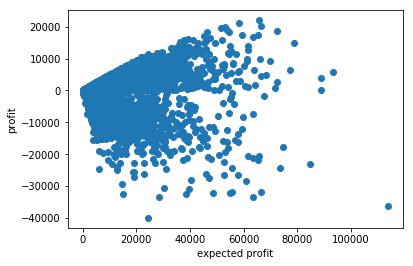

In [56]:
plt.scatter(df.expected_profit, df.profit)
plt.xlabel('expected profit')
plt.ylabel('profit')

## Upsample

In [57]:
#up sample charged off
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df.drop('loan_status', axis = 1), df['loan_status'])

In [58]:
df = pd.DataFrame(X_resampled, columns = df.drop('loan_status', axis = 1).columns)

In [59]:
len(df)

8726

## Remove Features not Available at Application

In [60]:
data_dict = pd.read_csv('../../data/AcceptedDataDictionary.csv')

In [61]:
columns_to_exclude = [
    'acc_open_past_24mths',
    'acc_now_delinq',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util',
    'collection_recovery_fee',
    'chargeoff_within_12_mths',
    'collections_12_mths_ex_med',
    'delinq_2yrs',
    'delinq_amnt',
    'inq_last_6mths',
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl',
    'mort_acc',
    'mths_since_recent_bc',
    'mths_since_recent_inq',
    'num_accts_ever_120_pd',
    'num_actv_bc_tl',
    'num_actv_rev_tl',
    'num_rev_tl_bal_gt_0',
    'num_tl_90g_dpd_24m',
    'num_tl_120dpd_2m',
    'num_tl_op_past_12m',
    'num_tl_30dpd',
    'out_prncp',
    'out_prncp_inv',
    'pct_tl_nvr_dlq',
    'percent_bc_gt_75',
    'pub_rec',
    'recoveries',
    'revol_bal',
    'revol_util',
    'tot_coll_amt',
    'tot_cur_bal',
    'tot_hi_cred_lim',
    'total_bal_ex_mort'
]

In [62]:
data_dict[data_dict.LoanStatNew.apply(lambda x: x in df.columns and x not in columns_to_exclude)] 

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
29,initial_list_status,"The initial listing status of the loan. Possible values are – W, F"
33,installment,The monthly payment owed by the borrower if the loan originates.
34,int_rate,Interest Rate on the loan
41,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
62,num_bc_sats,Number of satisfactory bankcard accounts


In [63]:
df = df.drop(columns_to_exclude,axis = 1)

In [64]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'zip_code', 'addr_state', 'dti', 'open_acc', 'total_acc',
       'initial_list_status', 'total_rec_late_fee', 'policy_code',
       'application_type', 'total_rev_hi_lim', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_sats',
       'pub_rec_bankruptcies', 'tax_liens', 'total_bc_limit',
       'total_il_high_credit_limit', 'disbursement_method',
       'debt_settlement_flag', 'profit', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'HOME_NONE', 'HOME_OTHER',
       'HOME_OWN', 'HOME_RENT', 'Income_Source Verified', 'Income_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'expect

## Black Box Models

In [226]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [225]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('profit', axis = 1), df['profit'], test_size=0.25, random_state=42)

In [1161]:
def preprocess(X_train, X_test, y_train, y_test):
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess(X_train, X_test, y_train, y_test)

In [1152]:
# Linear Regression Baseline
model_linear = LinearRegression()
scores_linear = cross_val_score(model_linear, X_train, y_train, cv=5)
scores_linear

array([0.12329869, 0.13823992, 0.12814836, 0.09430744, 0.1191243 ])

In [ ]:
# get 2nd degree polynomial features
poly_2 = PolynomialFeatures(2)
X_train_poly = poly_2.fit_transform(X_train)

In [1153]:
# Linear Regression Polynomial Features
model_poly = LinearRegression()
scores_poly = cross_val_score(model_linear, X_train_poly, y_train, cv=5)
scores_poly

array([-3.94818341e+16, -1.27843492e+16, -1.73230489e+16, -8.77544500e+17,
       -2.49735258e+16])

In [1158]:
# Lasso Polynomial Features
model_lasso = LassoCV(cv = 5)
scores_lasso = cross_val_score(model_lasso, X_train_poly, y_train, cv=5)
scores_lasso

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coo

array([0.24016489, 0.19282469, 0.23500796, 0.19203321, 0.21013616])

**Ridge Polynomial Features**

In [1162]:
# ridge polynomial features
model_ridge= RidgeCV(cv = 5)
scores_ridge = cross_val_score(model_ridge, X_train_poly, y_train, cv=5)
scores_ridge

array([-2.14595865e-01, -2.92466551e-01, -4.14199715e-01,  4.38192088e-02,
       -4.63591637e+02])

**Random Forest**

[Guide to hyperparameter tuning](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [1208]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 3, stop = X_train.shape[1], num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': [3, 8, 14, 20, 25, 31, 37, 42, 48, 54], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [1209]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=5, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': [3, 8, 14, 20, 25, 31, 37, 42, 48, 54], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=5)

In [1210]:
rf_random.best_params_

{'n_estimators': 350,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 70,
 'bootstrap': False}

In [1211]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80],
    'max_features': [2,3,4],
    'min_samples_leaf': [1],
    'min_samples_split': [4,5,6],
    'n_estimators': [330, 340, 350, 360, 370]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)

In [1212]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.2min finished


{'bootstrap': True,
 'max_depth': 70,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 350}

In [1213]:
best_grid = grid_search.best_estimator_

In [1214]:
scores_rf = cross_val_score(best_grid, X_train, y_train, cv=5)
scores_rf

array([0.69006661, 0.62870148, 0.68669447, 0.6396513 , 0.6924725 ])

**xgboost**

[Guide to hyperparameter tuning for xgboost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [1217]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [1221]:
max_depth = [int(x) for x in np.linspace(start = 3, stop = 10, num = 7)]
learning_rate = [0.05,0.1,0.3]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
gamma = [int(x) for x in np.linspace(start = 0, stop = 0.5, num = 5)]
min_child_weight = [int(x) for x in np.linspace(start = 1, stop = 6, num = 5)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [3, 8, 14, 20, 25, 31, 37, 42, 48, 54], 'max_depth': [3, 4, 5, 6, 7, 8, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [1222]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xg = XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xg_random = RandomizedSearchCV(estimator = xg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=5, random_state=42, n_jobs = -1)
# Fit the random search model
xg_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 28.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [3, 8, 14, 20, 25, 31, 37, 42, 48, 54], 'max_depth': [3, 4, 5, 6, 7, 8, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=5)

In [1223]:
xg_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 42,
 'max_depth': 7}

In [1226]:
param_grid = {
    'max_depth': [6,7,8],
    'max_features': [40, 42, 45],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [950, 1000, 1250, 1500]
}
# Create a based model
xg = XGBRegressor()
# Instantiate the grid search model
grid_search_xg = GridSearchCV(estimator = xg, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)

In [1227]:
# Fit the grid search to the data
grid_search_xg.fit(X_train, y_train)
grid_search_xg.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 20.7min finished


{'max_depth': 7,
 'max_features': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [1228]:
best_grid_xg = grid_search_xg.best_estimator_

In [1230]:
scores_xg = cross_val_score(best_grid_xg, X_train, y_train, cv=5)
scores_xg

array([0.72170001, 0.63979721, 0.73649377, 0.69239014, 0.71967552])

In [1232]:
scores = [scores_elastic, scores_lasso, scores_linear, scores_ridge, scores_rf, scores_xg]

## Fairness

**Sample races**

In [65]:
df_copy = df.copy()

In [305]:
df = df_copy

In [306]:
def clean_zipcode(x):
    x = x.replace("xx","")
    while len(x)<3:
        x = '0'+x
    return x
df['zip_code'] = df['zip_code'].apply(clean_zipcode)

In [307]:
races = ["White","Black",'Native','Asian','Islander','Hispanic']
race_by_zip = pop_by_zip[races]

In [308]:
def sample_race(x):
    zipcode = x['zip_code']
    race_dist = race_by_zip[race_by_zip.index == zipcode].values
    race_dist = race_dist/np.sum(race_dist)
    race_dist = race_dist[0,:]
    race_sample = np.random.multinomial(1, race_dist)
    for idx, r in enumerate(races):
        x[r] = race_sample[idx]
    return x

In [309]:
df = df.apply(sample_race, axis = 1)

In [310]:
def sample_gender(x):
    zipcode = x['zip_code']
    p_female = pop_by_zip[pop_by_zip.index == zipcode]['Female'].values
    if p_female > np.random.uniform(0,1):
        female_sample = 1
    else:
        female_sample = 0
    x["female"] = female_sample
    return x

In [311]:
df = df.apply(sample_gender, axis = 1)

In [312]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,zip_code,addr_state,dti,open_acc,total_acc,initial_list_status,total_rec_late_fee,policy_code,application_type,total_rev_hi_lim,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,profit,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,HOME_NONE,HOME_OTHER,HOME_OWN,HOME_RENT,Income_Source Verified,Income_Verified,purpose_car,purpose_credit_card,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,expected_profit,White,Black,Native,Asian,Islander,Hispanic,female
0,9000.0,1,18.85,329.23,3.0,140000.0,075,0,15.38,11.0,23.0,1,0.0,1.0,1,31800.0,5.0,6.0,12.0,7.0,9.0,11.0,0.0,0.0,24800.0,47151.0,1,1,-6819.43,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,6109.151212,0,0,0,0,0,1,1
1,10000.0,1,7.90,312.91,10.0,55000.0,604,1,15.27,7.0,22.0,1,0.0,1.0,1,15500.0,4.0,10.0,3.0,4.0,10.0,7.0,1.0,0.0,15500.0,16695.0,1,1,427.65,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2562.160390,0,0,0,0,0,1,0
2,32000.0,0,21.45,873.83,10.0,80000.0,070,0,9.44,6.0,7.0,0,0.0,1.0,1,12900.0,3.0,3.0,2.0,5.0,5.0,6.0,0.0,0.0,10800.0,7739.0,1,1,-26647.61,0,0,0,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,52554.665154,0,0,0,1,0,0,1
3,15000.0,1,12.69,503.18,10.0,90000.0,255,2,21.24,8.0,16.0,1,0.0,1.0,1,14100.0,2.0,3.0,11.0,4.0,5.0,8.0,0.0,0.0,9400.0,54624.0,1,1,-13516.57,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6465.815672,1,0,0,0,0,0,1
4,3625.0,1,26.77,147.55,10.0,76000.0,782,3,8.80,9.0,14.0,0,30.0,1.0,1,5800.0,5.0,7.0,4.0,7.0,9.0,9.0,0.0,0.0,4400.0,24253.0,1,1,-2247.55,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3760.118731,1,0,0,0,0,0,1


In [313]:
def sample_age(x):
    zipcode = x['zip_code']
    p_old = pop_by_zip[pop_by_zip.index == zipcode]['Old'].values
    if p_old > np.random.uniform(0,1):
        old_sample = 1
    else:
        old_sample = 0
    x["old"] = old_sample
    return x

In [314]:
df = df.apply(sample_age, axis = 1)

**fair linear regression**

In [374]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.modules import Module

In [316]:
protected_classes = ['White', 'Black', 'Native', 'Asian', 'Islander','Hispanic', 'female', 'old']
protected_classes_df = df[protected_classes]
df = df.drop(protected_classes, axis = 1)

In [317]:
X_train, X_test, y_train, y_test, protected_train, protected_test = train_test_split(df.drop('profit', axis = 1), df['profit'], protected_classes_df, test_size=0.25, random_state=42)



In [348]:
def preprocess(X_train, X_test, y_train, y_test):
    scaler_X = StandardScaler().fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)
    scaler_y = StandardScaler().fit(y_train.values.reshape(-1,1))
    y_train = scaler_y.transform(y_train.values.reshape(-1,1))
    y_test = scaler_y.transform(y_test.values.reshape(-1,1))
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess(X_train, X_test, y_train, y_test)

In [349]:
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [356]:
class FairMSE(Module):
    def __init__(self, classes, alpha):
        super().__init__()
        self.classes = torch.Tensor(list(classes.values == 1))==True
        self.alpha = alpha
    
    def forward(self, outputs, labels):  
        mse = nn.MSELoss(reduce = True)
        protected_outputs = outputs[self.classes]
        protected_labels = labels[self.classes]
        total_mse = mse(outputs, labels)
        protected_mse = mse(protected_outputs, protected_labels)
        print("protected mse: {}, total mse {}".format(total_mse, protected_mse))
        return total_mse + self.alpha*(total_mse-protected_mse)**2

In [372]:
model = LinearRegression(X_train.shape[1])
criterion = FairMSE(protected_train['Black'], 0)
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent
epochs = 1000

for epoch in range(epochs):
    #increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(X_train)).float()
    labels = Variable(torch.from_numpy(y_train)).float()
    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data))

In [375]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_units):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_units)
        self.l2 = nn.Linear(hidden_units, 1)
    def forward(self, x):
        hidden = F.relu(self.l1(x))
        out = self.l2(hidden)
        return out

In [382]:
model = MLP(X_train.shape[1], 10)
criterion = FairMSE(protected_train['Black'], 1)
l_rate = 0.05
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent
epochs = 10000

for epoch in range(epochs):
    #increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(X_train)).float()
    labels = Variable(torch.from_numpy(y_train)).float()
    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data))

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:54: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


protected mse: 1.1098732948303223, total mse 1.1044702529907227
epoch 0, loss 1.1099025011062622
protected mse: 1.0779303312301636, total mse 1.073874831199646
epoch 1, loss 1.0779467821121216
protected mse: 1.0550906658172607, total mse 1.0520318746566772
epoch 2, loss 1.0550999641418457
protected mse: 1.0382174253463745, total mse 1.0358768701553345
epoch 3, loss 1.0382229089736938
protected mse: 1.0252883434295654, total mse 1.0234850645065308
epoch 4, loss 1.0252915620803833
protected mse: 1.0150113105773926, total mse 1.01365327835083
epoch 5, loss 1.0150130987167358
protected mse: 1.0065685510635376, total mse 1.0055317878723145
epoch 6, loss 1.0065696239471436
protected mse: 0.9993003606796265, total mse 0.9984467029571533
epoch 7, loss 0.9993010759353638
protected mse: 0.9929789900779724, total mse 0.9922258257865906
epoch 8, loss 0.9929795861244202
protected mse: 0.9873303174972534, total mse 0.9865745306015015
epoch 9, loss 0.9873309135437012
protected mse: 0.9822463989257812

epoch 108, loss 0.8515538573265076
protected mse: 0.8508427739143372, total mse 0.8365173935890198
epoch 109, loss 0.8510479927062988
protected mse: 0.850325882434845, total mse 0.8359047770500183
epoch 110, loss 0.8505338430404663
protected mse: 0.8498212695121765, total mse 0.8352985382080078
epoch 111, loss 0.8500321507453918
protected mse: 0.8493170738220215, total mse 0.8347039222717285
epoch 112, loss 0.8495306372642517
protected mse: 0.8488197922706604, total mse 0.834102988243103
epoch 113, loss 0.8490363955497742
protected mse: 0.8483337163925171, total mse 0.8335222601890564
epoch 114, loss 0.8485531210899353
protected mse: 0.8478481769561768, total mse 0.8329296708106995
epoch 115, loss 0.8480707406997681
protected mse: 0.8473827242851257, total mse 0.8323683142662048
epoch 116, loss 0.8476081490516663
protected mse: 0.8469163775444031, total mse 0.8318027257919312
epoch 117, loss 0.8471447825431824
protected mse: 0.8464627265930176, total mse 0.8312423825263977
epoch 118, l

protected mse: 0.8079997897148132, total mse 0.783087432384491
epoch 241, loss 0.8086203932762146
protected mse: 0.8077520132064819, total mse 0.782818615436554
epoch 242, loss 0.8083736896514893
protected mse: 0.8075077533721924, total mse 0.7825702428817749
epoch 243, loss 0.808129608631134
protected mse: 0.807266116142273, total mse 0.7823169231414795
epoch 244, loss 0.8078885674476624
protected mse: 0.807025134563446, total mse 0.7820877432823181
epoch 245, loss 0.8076469898223877
protected mse: 0.806785523891449, total mse 0.7818414568901062
epoch 246, loss 0.8074077367782593
protected mse: 0.8065446019172668, total mse 0.7815805673599243
epoch 247, loss 0.8071678280830383
protected mse: 0.8063081502914429, total mse 0.7813505530357361
epoch 248, loss 0.8069310188293457
protected mse: 0.8060763478279114, total mse 0.781108558177948
epoch 249, loss 0.8066997528076172
protected mse: 0.8058457374572754, total mse 0.7808438539505005
epoch 250, loss 0.8064708113670349
protected mse: 0.

epoch 362, loss 0.7832779884338379
protected mse: 0.7826295495033264, total mse 0.761006772518158
epoch 363, loss 0.7830970883369446
protected mse: 0.7824481129646301, total mse 0.7608650326728821
epoch 364, loss 0.7829139232635498
protected mse: 0.7822765707969666, total mse 0.7607242465019226
epoch 365, loss 0.7827410697937012
protected mse: 0.7821053266525269, total mse 0.7605846524238586
epoch 366, loss 0.7825684547424316
protected mse: 0.7819240093231201, total mse 0.7604346871376038
epoch 367, loss 0.7823858261108398
protected mse: 0.7817456126213074, total mse 0.7603293657302856
epoch 368, loss 0.782204270362854
protected mse: 0.781575083732605, total mse 0.7601911425590515
epoch 369, loss 0.7820323705673218
protected mse: 0.7813972234725952, total mse 0.7600451707839966
epoch 370, loss 0.7818531394004822
protected mse: 0.7812212109565735, total mse 0.7599130272865295
epoch 371, loss 0.7816752791404724
protected mse: 0.7810444235801697, total mse 0.7598216533660889
epoch 372, lo

epoch 493, loss 0.762302577495575
protected mse: 0.761792004108429, total mse 0.7425000071525574
epoch 494, loss 0.7621641755104065
protected mse: 0.7616514563560486, total mse 0.7423608303070068
epoch 495, loss 0.7620235681533813
protected mse: 0.7615118026733398, total mse 0.7422441840171814
epoch 496, loss 0.761883020401001
protected mse: 0.7613804936408997, total mse 0.742099404335022
epoch 497, loss 0.7617522478103638
protected mse: 0.7612363696098328, total mse 0.7419582009315491
epoch 498, loss 0.7616080045700073
protected mse: 0.7611104249954224, total mse 0.7418506741523743
epoch 499, loss 0.7614813446998596
protected mse: 0.7609609961509705, total mse 0.7417177557945251
epoch 500, loss 0.76133131980896
protected mse: 0.7608386874198914, total mse 0.7415784001350403
epoch 501, loss 0.7612096667289734
protected mse: 0.7606965899467468, total mse 0.741504967212677
epoch 502, loss 0.761064887046814
protected mse: 0.7605671882629395, total mse 0.7413336634635925
epoch 503, loss 0.

epoch 625, loss 0.744024395942688
protected mse: 0.7435819506645203, total mse 0.7263599038124084
epoch 626, loss 0.7438785433769226
protected mse: 0.7434489727020264, total mse 0.7262372970581055
epoch 627, loss 0.7437452077865601
protected mse: 0.7433091998100281, total mse 0.7261321544647217
epoch 628, loss 0.7436042428016663
protected mse: 0.7431731224060059, total mse 0.7260496616363525
epoch 629, loss 0.743466317653656
protected mse: 0.7430389523506165, total mse 0.7259034514427185
epoch 630, loss 0.74333256483078
protected mse: 0.7428916096687317, total mse 0.7257916927337646
epoch 631, loss 0.7431840300559998
protected mse: 0.7427573800086975, total mse 0.7257176637649536
epoch 632, loss 0.7430477142333984
protected mse: 0.742621123790741, total mse 0.7255502939224243
epoch 633, loss 0.7429125308990479
protected mse: 0.7424822449684143, total mse 0.7254518866539001
epoch 634, loss 0.7427722811698914
protected mse: 0.7423511743545532, total mse 0.725310742855072
epoch 635, loss 

epoch 755, loss 0.7272288203239441
protected mse: 0.7269122004508972, total mse 0.712914228439331
epoch 756, loss 0.7271081209182739
protected mse: 0.7267888188362122, total mse 0.7128517031669617
epoch 757, loss 0.7269830703735352
protected mse: 0.7266721725463867, total mse 0.7127328515052795
epoch 758, loss 0.7268664836883545
protected mse: 0.7265629768371582, total mse 0.7126664519309998
epoch 759, loss 0.7267560958862305
protected mse: 0.726438045501709, total mse 0.7125366926193237
epoch 760, loss 0.7266312837600708
protected mse: 0.7263210415840149, total mse 0.7124991416931152
epoch 761, loss 0.72651207447052
protected mse: 0.7262132167816162, total mse 0.7124052047729492
epoch 762, loss 0.7264038920402527
protected mse: 0.7260988354682922, total mse 0.7122774720191956
epoch 763, loss 0.7262898683547974
protected mse: 0.7259726524353027, total mse 0.7122045755386353
epoch 764, loss 0.7261621952056885
protected mse: 0.7258533835411072, total mse 0.7120938301086426
epoch 765, los

epoch 887, loss 0.7115558385848999
protected mse: 0.7113117575645447, total mse 0.6994168758392334
epoch 888, loss 0.7114532589912415
protected mse: 0.7112017273902893, total mse 0.6993771195411682
epoch 889, loss 0.7113415598869324
protected mse: 0.7111184597015381, total mse 0.6992630362510681
epoch 890, loss 0.7112590074539185
protected mse: 0.7110213041305542, total mse 0.6992062926292419
epoch 891, loss 0.7111608982086182
protected mse: 0.7109255790710449, total mse 0.6990168690681458
epoch 892, loss 0.7110673785209656
protected mse: 0.7108281254768372, total mse 0.6989966034889221
epoch 893, loss 0.7109681367874146
protected mse: 0.7107305526733398, total mse 0.6988693475723267
epoch 894, loss 0.7108712196350098
protected mse: 0.7106351852416992, total mse 0.6989094018936157
epoch 895, loss 0.710772693157196
protected mse: 0.7105423808097839, total mse 0.6988176107406616
epoch 896, loss 0.710679829120636
protected mse: 0.7104430794715881, total mse 0.6987263560295105
epoch 897, l

protected mse: 0.6988779902458191, total mse 0.6889839768409729
epoch 1020, loss 0.6989758610725403
protected mse: 0.698794960975647, total mse 0.6888910531997681
epoch 1021, loss 0.6988930702209473
protected mse: 0.6986985802650452, total mse 0.6887944340705872
epoch 1022, loss 0.6987966895103455
protected mse: 0.6986109018325806, total mse 0.6888608336448669
epoch 1023, loss 0.6987059712409973
protected mse: 0.6985119581222534, total mse 0.6886210441589355
epoch 1024, loss 0.6986097693443298
protected mse: 0.6984285712242126, total mse 0.6886304616928101
epoch 1025, loss 0.6985245943069458
protected mse: 0.6983315944671631, total mse 0.6885026097297668
epoch 1026, loss 0.698428213596344
protected mse: 0.6982378959655762, total mse 0.6884505748748779
epoch 1027, loss 0.6983336806297302
protected mse: 0.6981363296508789, total mse 0.6883388757705688
epoch 1028, loss 0.6982322931289673
protected mse: 0.6980515122413635, total mse 0.688262403011322
epoch 1029, loss 0.6981473565101624
pro

protected mse: 0.6878248453140259, total mse 0.679355800151825
epoch 1149, loss 0.6878965497016907
protected mse: 0.6877414584159851, total mse 0.6792864799499512
epoch 1150, loss 0.6878129243850708
protected mse: 0.6876795887947083, total mse 0.6792575716972351
epoch 1151, loss 0.687750518321991
protected mse: 0.6875820159912109, total mse 0.6790927052497864
epoch 1152, loss 0.6876540780067444
protected mse: 0.6875046491622925, total mse 0.6791765689849854
epoch 1153, loss 0.687574028968811
protected mse: 0.6874404549598694, total mse 0.6789303421974182
epoch 1154, loss 0.6875128746032715
protected mse: 0.6873513460159302, total mse 0.6789832711219788
epoch 1155, loss 0.6874213814735413
protected mse: 0.6872774362564087, total mse 0.67889803647995
epoch 1156, loss 0.6873476505279541
protected mse: 0.6872074007987976, total mse 0.6789058446884155
epoch 1157, loss 0.687276303768158
protected mse: 0.6871392726898193, total mse 0.6788322925567627
epoch 1158, loss 0.6872082948684692
protec

epoch 1277, loss 0.6789584159851074
protected mse: 0.6788607835769653, total mse 0.6736482381820679
epoch 1278, loss 0.6788879632949829
protected mse: 0.6788048148155212, total mse 0.6736856698989868
epoch 1279, loss 0.6788310408592224
protected mse: 0.6787241101264954, total mse 0.6735163927078247
epoch 1280, loss 0.6787512302398682
protected mse: 0.678655743598938, total mse 0.6735161542892456
epoch 1281, loss 0.6786821484565735
protected mse: 0.6785813570022583, total mse 0.673454225063324
epoch 1282, loss 0.6786076426506042
protected mse: 0.6785026788711548, total mse 0.6734383702278137
epoch 1283, loss 0.6785283088684082
protected mse: 0.678436815738678, total mse 0.6733939051628113
epoch 1284, loss 0.6784622669219971
protected mse: 0.6783716082572937, total mse 0.6732978224754333
epoch 1285, loss 0.6783973574638367
protected mse: 0.6783035397529602, total mse 0.6733628511428833
epoch 1286, loss 0.6783279776573181
protected mse: 0.6782423853874207, total mse 0.6732203960418701
epo

protected mse: 0.6709385514259338, total mse 0.6682025194168091
epoch 1410, loss 0.6709460616111755
protected mse: 0.6708866953849792, total mse 0.6681281328201294
epoch 1411, loss 0.6708943247795105
protected mse: 0.670822024345398, total mse 0.6681183576583862
epoch 1412, loss 0.6708293557167053
protected mse: 0.670784592628479, total mse 0.668022871017456
epoch 1413, loss 0.6707922220230103
protected mse: 0.6707261800765991, total mse 0.6680271625518799
epoch 1414, loss 0.6707334518432617
protected mse: 0.6706791520118713, total mse 0.6679729223251343
epoch 1415, loss 0.6706864833831787
protected mse: 0.6706292629241943, total mse 0.6679299473762512
epoch 1416, loss 0.6706365346908569
protected mse: 0.6705564856529236, total mse 0.6678274273872375
epoch 1417, loss 0.6705639362335205
protected mse: 0.6705018281936646, total mse 0.667738676071167
epoch 1418, loss 0.6705094575881958
protected mse: 0.6704393625259399, total mse 0.6677566766738892
epoch 1419, loss 0.6704465746879578
prot

protected mse: 0.6636142730712891, total mse 0.6598708033561707
epoch 1544, loss 0.6636282801628113
protected mse: 0.6635676622390747, total mse 0.6598374843597412
epoch 1545, loss 0.6635815501213074
protected mse: 0.6635158061981201, total mse 0.6597304940223694
epoch 1546, loss 0.6635301113128662
protected mse: 0.6634780168533325, total mse 0.6597509980201721
epoch 1547, loss 0.6634919047355652
protected mse: 0.6634242534637451, total mse 0.6595759391784668
epoch 1548, loss 0.6634390354156494
protected mse: 0.6633755564689636, total mse 0.6596158742904663
epoch 1549, loss 0.6633896827697754
protected mse: 0.6633182168006897, total mse 0.6594624519348145
epoch 1550, loss 0.6633330583572388
protected mse: 0.6632757782936096, total mse 0.6595010161399841
epoch 1551, loss 0.6632900238037109
protected mse: 0.6632437109947205, total mse 0.6593772768974304
epoch 1552, loss 0.6632586717605591
protected mse: 0.6631860733032227, total mse 0.659390926361084
epoch 1553, loss 0.6632004976272583
p

epoch 1674, loss 0.6574581861495972
protected mse: 0.657383382320404, total mse 0.6523967981338501
epoch 1675, loss 0.6574082374572754
protected mse: 0.6573281288146973, total mse 0.6523224711418152
epoch 1676, loss 0.6573531627655029
protected mse: 0.6572881937026978, total mse 0.6522976756095886
epoch 1677, loss 0.6573131084442139
protected mse: 0.6572566628456116, total mse 0.6522266268730164
epoch 1678, loss 0.6572819352149963
protected mse: 0.657209038734436, total mse 0.652271032333374
epoch 1679, loss 0.6572334170341492
protected mse: 0.6571668386459351, total mse 0.6520782709121704
epoch 1680, loss 0.6571927070617676
protected mse: 0.6571243405342102, total mse 0.6520519852638245
epoch 1681, loss 0.6571500897407532
protected mse: 0.6570771932601929, total mse 0.6520669460296631
epoch 1682, loss 0.6571022868156433
protected mse: 0.6570330262184143, total mse 0.6520377397537231
epoch 1683, loss 0.6570580005645752
protected mse: 0.6570114493370056, total mse 0.6519705057144165
epo

protected mse: 0.6522787809371948, total mse 0.6458874940872192
epoch 1805, loss 0.652319610118866
protected mse: 0.6522566676139832, total mse 0.6459745168685913
epoch 1806, loss 0.6522961258888245
protected mse: 0.6522056460380554, total mse 0.6459168791770935
epoch 1807, loss 0.6522452235221863
protected mse: 0.6521539092063904, total mse 0.6458646655082703
epoch 1808, loss 0.6521934866905212
protected mse: 0.6521051526069641, total mse 0.6457903385162354
epoch 1809, loss 0.6521450281143188
protected mse: 0.6520881652832031, total mse 0.645823061466217
epoch 1810, loss 0.6521274447441101
protected mse: 0.6520374417304993, total mse 0.6456899046897888
epoch 1811, loss 0.6520777344703674
protected mse: 0.6520070433616638, total mse 0.6458020210266113
epoch 1812, loss 0.6520455479621887
protected mse: 0.6519694328308105, total mse 0.6455827355384827
epoch 1813, loss 0.6520102024078369
protected mse: 0.6519400477409363, total mse 0.645711362361908
epoch 1814, loss 0.6519788503646851
pro

epoch 1937, loss 0.6483386158943176
protected mse: 0.6482673287391663, total mse 0.6423963308334351
epoch 1938, loss 0.6483017802238464
protected mse: 0.648223876953125, total mse 0.6422819495201111
epoch 1939, loss 0.648259162902832
protected mse: 0.6481842994689941, total mse 0.6422865986824036
epoch 1940, loss 0.648219108581543
protected mse: 0.6481615304946899, total mse 0.6423314809799194
epoch 1941, loss 0.6481955051422119
protected mse: 0.6481503248214722, total mse 0.6423109173774719
epoch 1942, loss 0.6481844186782837
protected mse: 0.6481260061264038, total mse 0.6422529220581055
epoch 1943, loss 0.6481605172157288
protected mse: 0.6481109857559204, total mse 0.6421881318092346
epoch 1944, loss 0.6481460928916931
protected mse: 0.6480640769004822, total mse 0.6422073245048523
epoch 1945, loss 0.648098349571228
protected mse: 0.6480257511138916, total mse 0.6422733068466187
epoch 1946, loss 0.6480588316917419
protected mse: 0.6480153203010559, total mse 0.6421489119529724
epoc

epoch 2063, loss 0.6453778743743896
protected mse: 0.6453309655189514, total mse 0.640366792678833
epoch 2064, loss 0.6453555822372437
protected mse: 0.6453348398208618, total mse 0.6402016878128052
epoch 2065, loss 0.6453611850738525
protected mse: 0.645321249961853, total mse 0.640474259853363
epoch 2066, loss 0.6453447341918945
protected mse: 0.6453138589859009, total mse 0.6400172114372253
epoch 2067, loss 0.6453419327735901
protected mse: 0.6453133821487427, total mse 0.6403552293777466
epoch 2068, loss 0.6453379392623901
protected mse: 0.6452684998512268, total mse 0.6399944424629211
epoch 2069, loss 0.6452963352203369
protected mse: 0.645247757434845, total mse 0.6402609944343567
epoch 2070, loss 0.6452726125717163
protected mse: 0.6452063918113708, total mse 0.6399691104888916
epoch 2071, loss 0.6452338099479675
protected mse: 0.6451765894889832, total mse 0.6400178670883179
epoch 2072, loss 0.645203173160553
protected mse: 0.6451498866081238, total mse 0.6399151682853699
epoch

protected mse: 0.6430726051330566, total mse 0.6384975910186768
epoch 2174, loss 0.6430935263633728
protected mse: 0.6430295705795288, total mse 0.6382838487625122
epoch 2175, loss 0.6430521011352539
protected mse: 0.6430473923683167, total mse 0.6386354565620422
epoch 2176, loss 0.6430668830871582
protected mse: 0.6429939866065979, total mse 0.6382558941841125
epoch 2177, loss 0.6430164575576782
protected mse: 0.6429681777954102, total mse 0.6384002566337585
epoch 2178, loss 0.6429890394210815
protected mse: 0.6429375410079956, total mse 0.6382699012756348
epoch 2179, loss 0.6429593563079834
protected mse: 0.6429271697998047, total mse 0.638452410697937
epoch 2180, loss 0.6429471969604492
protected mse: 0.6428957581520081, total mse 0.6381741762161255
epoch 2181, loss 0.642918050289154
protected mse: 0.642855167388916, total mse 0.6382948756217957
epoch 2182, loss 0.6428759694099426
protected mse: 0.6428388357162476, total mse 0.6381602883338928
epoch 2183, loss 0.6428607106208801
pro

protected mse: 0.6409687399864197, total mse 0.6369980573654175
epoch 2284, loss 0.6409845352172852
protected mse: 0.6409666538238525, total mse 0.6371300220489502
epoch 2285, loss 0.6409813761711121
protected mse: 0.640976071357727, total mse 0.637026846408844
epoch 2286, loss 0.6409916877746582
protected mse: 0.6409589052200317, total mse 0.6372678279876709
epoch 2287, loss 0.6409725546836853
protected mse: 0.6409194469451904, total mse 0.6370100975036621
epoch 2288, loss 0.6409347057342529
protected mse: 0.6409220099449158, total mse 0.637231707572937
epoch 2289, loss 0.6409355998039246
protected mse: 0.6409276127815247, total mse 0.636915922164917
epoch 2290, loss 0.640943706035614
protected mse: 0.6409097909927368, total mse 0.6372591257095337
epoch 2291, loss 0.6409231424331665
protected mse: 0.6408814787864685, total mse 0.636893093585968
epoch 2292, loss 0.6408973932266235
protected mse: 0.6408814787864685, total mse 0.6371852159500122
epoch 2293, loss 0.6408951282501221
protec

protected mse: 0.6389574408531189, total mse 0.6349497437477112
epoch 2398, loss 0.6389734745025635
protected mse: 0.6389482021331787, total mse 0.635223388671875
epoch 2399, loss 0.6389620900154114
protected mse: 0.6389128565788269, total mse 0.6348371505737305
epoch 2400, loss 0.6389294862747192
protected mse: 0.6388779878616333, total mse 0.6351287364959717
epoch 2401, loss 0.6388920545578003
protected mse: 0.6388388872146606, total mse 0.6349097490310669
epoch 2402, loss 0.6388543248176575
protected mse: 0.638810932636261, total mse 0.6350155472755432
epoch 2403, loss 0.6388253569602966
protected mse: 0.6387906074523926, total mse 0.6349486112594604
epoch 2404, loss 0.6388053894042969
protected mse: 0.6387993693351746, total mse 0.6351653337478638
epoch 2405, loss 0.6388126015663147
protected mse: 0.6387868523597717, total mse 0.6349029541015625
epoch 2406, loss 0.6388019323348999
protected mse: 0.6387344002723694, total mse 0.6350710988044739
epoch 2407, loss 0.6387478113174438
pr

protected mse: 0.6369960308074951, total mse 0.6332131624221802
epoch 2492, loss 0.6370103359222412
protected mse: 0.6369736790657043, total mse 0.633418619632721
epoch 2493, loss 0.6369863152503967
protected mse: 0.6369646787643433, total mse 0.633169412612915
epoch 2494, loss 0.6369791030883789
protected mse: 0.6369322538375854, total mse 0.6332093477249146
epoch 2495, loss 0.6369461417198181
protected mse: 0.6369266510009766, total mse 0.6330540180206299
epoch 2496, loss 0.63694167137146
protected mse: 0.6369096040725708, total mse 0.6331126689910889
epoch 2497, loss 0.6369240283966064
protected mse: 0.6368905901908875, total mse 0.6330324411392212
epoch 2498, loss 0.6369054913520813
protected mse: 0.6368492841720581, total mse 0.6332058906555176
epoch 2499, loss 0.636862576007843
protected mse: 0.6368505358695984, total mse 0.6329900026321411
epoch 2500, loss 0.6368654370307922
protected mse: 0.6368227601051331, total mse 0.63312166929245
epoch 2501, loss 0.6368364691734314
protect

protected mse: 0.6345182657241821, total mse 0.6308797001838684
epoch 2599, loss 0.6345314979553223
protected mse: 0.6344969272613525, total mse 0.6307654976844788
epoch 2600, loss 0.63451087474823
protected mse: 0.634484052658081, total mse 0.630906343460083
epoch 2601, loss 0.6344968676567078
protected mse: 0.6344543099403381, total mse 0.6307284235954285
epoch 2602, loss 0.6344681978225708
protected mse: 0.6344174742698669, total mse 0.6307505965232849
epoch 2603, loss 0.6344309449195862
protected mse: 0.6343978047370911, total mse 0.630780041217804
epoch 2604, loss 0.6344109177589417
protected mse: 0.6343795657157898, total mse 0.6307045817375183
epoch 2605, loss 0.6343930959701538
protected mse: 0.6343548893928528, total mse 0.6308214664459229
epoch 2606, loss 0.6343673467636108
protected mse: 0.6343315243721008, total mse 0.6307172179222107
epoch 2607, loss 0.6343445777893066
protected mse: 0.6343069672584534, total mse 0.6307766437530518
epoch 2608, loss 0.6343194246292114
prote

protected mse: 0.6313257813453674, total mse 0.627797544002533
epoch 2713, loss 0.6313382387161255
protected mse: 0.6312864422798157, total mse 0.6277121305465698
epoch 2714, loss 0.6312991976737976
protected mse: 0.6312848925590515, total mse 0.6278678774833679
epoch 2715, loss 0.6312965750694275
protected mse: 0.6312569379806519, total mse 0.6275269985198975
epoch 2716, loss 0.6312708258628845
protected mse: 0.6311996579170227, total mse 0.6277088522911072
epoch 2717, loss 0.6312118172645569
protected mse: 0.6311580538749695, total mse 0.6274932622909546
epoch 2718, loss 0.631171464920044
protected mse: 0.6311426758766174, total mse 0.6276753544807434
epoch 2719, loss 0.6311547160148621
protected mse: 0.6310986876487732, total mse 0.6274803280830383
epoch 2720, loss 0.6311118006706238
protected mse: 0.6310858130455017, total mse 0.6276742219924927
epoch 2721, loss 0.6310974359512329
protected mse: 0.6310387849807739, total mse 0.6273944973945618
epoch 2722, loss 0.6310520768165588
pr

epoch 2818, loss 0.6277313232421875
protected mse: 0.6277143955230713, total mse 0.6254436373710632
epoch 2819, loss 0.6277195811271667
protected mse: 0.6276891827583313, total mse 0.6251092553138733
epoch 2820, loss 0.6276958584785461
protected mse: 0.6276478171348572, total mse 0.6253277063369751
epoch 2821, loss 0.627653181552887
protected mse: 0.6276146769523621, total mse 0.6250937581062317
epoch 2822, loss 0.627621054649353
protected mse: 0.627589225769043, total mse 0.6253178119659424
epoch 2823, loss 0.6275944113731384
protected mse: 0.6275845766067505, total mse 0.625017523765564
epoch 2824, loss 0.6275911927223206
protected mse: 0.6275362968444824, total mse 0.6252411603927612
epoch 2825, loss 0.6275415420532227
protected mse: 0.6274856328964233, total mse 0.6250798106193542
epoch 2826, loss 0.6274914145469666
protected mse: 0.6274637579917908, total mse 0.6252293586730957
epoch 2827, loss 0.6274687647819519
protected mse: 0.6274476647377014, total mse 0.6250577569007874
epoc

epoch 2932, loss 0.6252714991569519
protected mse: 0.6252549290657043, total mse 0.6231167912483215
epoch 2933, loss 0.625259518623352
protected mse: 0.6252425312995911, total mse 0.6229891777038574
epoch 2934, loss 0.625247597694397
protected mse: 0.6252489686012268, total mse 0.6231554746627808
epoch 2935, loss 0.6252533793449402
protected mse: 0.6251879334449768, total mse 0.6228726506233215
epoch 2936, loss 0.6251932978630066
protected mse: 0.6251646280288696, total mse 0.6230127811431885
epoch 2937, loss 0.6251692771911621
protected mse: 0.6251391768455505, total mse 0.622900664806366
epoch 2938, loss 0.6251441836357117
protected mse: 0.6251630187034607, total mse 0.6231154203414917
epoch 2939, loss 0.625167191028595
protected mse: 0.6251128315925598, total mse 0.622832179069519
epoch 2940, loss 0.6251180171966553
protected mse: 0.6251538395881653, total mse 0.6230261921882629
epoch 2941, loss 0.6251583695411682
protected mse: 0.6251097917556763, total mse 0.6226491332054138
epoch

protected mse: 0.6227155923843384, total mse 0.6206474304199219
epoch 3059, loss 0.6227198839187622
protected mse: 0.6226980090141296, total mse 0.6202778220176697
epoch 3060, loss 0.6227038502693176
protected mse: 0.6227087378501892, total mse 0.6205921769142151
epoch 3061, loss 0.6227132081985474
protected mse: 0.6226495504379272, total mse 0.6201797127723694
epoch 3062, loss 0.6226556301116943
protected mse: 0.622599184513092, total mse 0.6204438209533691
epoch 3063, loss 0.6226038336753845
protected mse: 0.6225613951683044, total mse 0.6203256249427795
epoch 3064, loss 0.6225664019584656
protected mse: 0.6225457787513733, total mse 0.6204354166984558
epoch 3065, loss 0.6225502490997314
protected mse: 0.6225290894508362, total mse 0.6202803254127502
epoch 3066, loss 0.6225341558456421
protected mse: 0.6225364804267883, total mse 0.6204441785812378
epoch 3067, loss 0.6225408315658569
protected mse: 0.6224892735481262, total mse 0.6202776432037354
epoch 3068, loss 0.6224941611289978
p

protected mse: 0.6202664971351624, total mse 0.6178600192070007
epoch 3179, loss 0.6202722787857056
protected mse: 0.6202893257141113, total mse 0.618250846862793
epoch 3180, loss 0.6202934980392456
protected mse: 0.6202362775802612, total mse 0.6177674531936646
epoch 3181, loss 0.6202423572540283
protected mse: 0.6202396750450134, total mse 0.6181985139846802
epoch 3182, loss 0.6202438473701477
protected mse: 0.6202401518821716, total mse 0.6177517771720886
epoch 3183, loss 0.6202463507652283
protected mse: 0.6202630996704102, total mse 0.618262767791748
epoch 3184, loss 0.6202670931816101
protected mse: 0.6201958060264587, total mse 0.6177605986595154
epoch 3185, loss 0.6202017068862915
protected mse: 0.6201820969581604, total mse 0.6180727481842041
epoch 3186, loss 0.6201865673065186
protected mse: 0.620128870010376, total mse 0.6177639961242676
epoch 3187, loss 0.6201344728469849
protected mse: 0.6201029419898987, total mse 0.6180167198181152
epoch 3188, loss 0.6201072931289673
pro

epoch 3283, loss 0.6185246706008911
protected mse: 0.6185216307640076, total mse 0.6160168647766113
epoch 3284, loss 0.618527889251709
protected mse: 0.6184829473495483, total mse 0.6156551241874695
epoch 3285, loss 0.6184909343719482
protected mse: 0.6184744834899902, total mse 0.615944504737854
epoch 3286, loss 0.6184808611869812
protected mse: 0.6184432506561279, total mse 0.6155717372894287
epoch 3287, loss 0.6184514760971069
protected mse: 0.6184371709823608, total mse 0.6159662008285522
epoch 3288, loss 0.6184432506561279
protected mse: 0.6183992028236389, total mse 0.6156362891197205
epoch 3289, loss 0.6184068322181702
protected mse: 0.6183987855911255, total mse 0.6159119606018066
epoch 3290, loss 0.6184049844741821
protected mse: 0.6183688640594482, total mse 0.615534782409668
epoch 3291, loss 0.6183769106864929
protected mse: 0.6184457540512085, total mse 0.6160478591918945
epoch 3292, loss 0.6184514760971069
protected mse: 0.6183963418006897, total mse 0.6154012084007263
epo

epoch 3404, loss 0.6168586015701294
protected mse: 0.6168431639671326, total mse 0.614326000213623
epoch 3405, loss 0.6168494820594788
protected mse: 0.6168309450149536, total mse 0.6145147681236267
epoch 3406, loss 0.6168363094329834
protected mse: 0.616818904876709, total mse 0.6141673922538757
epoch 3407, loss 0.6168259382247925
protected mse: 0.6168033480644226, total mse 0.6145530939102173
epoch 3408, loss 0.6168084144592285
protected mse: 0.6167579293251038, total mse 0.6141823530197144
epoch 3409, loss 0.6167645454406738
protected mse: 0.616784930229187, total mse 0.6144875884056091
epoch 3410, loss 0.616790235042572
protected mse: 0.6167409420013428, total mse 0.6140927076339722
epoch 3411, loss 0.6167479753494263
protected mse: 0.6167370676994324, total mse 0.6143075227737427
epoch 3412, loss 0.6167429685592651
protected mse: 0.6166897416114807, total mse 0.614006757736206
epoch 3413, loss 0.6166969537734985
protected mse: 0.61669921875, total mse 0.614335834980011
epoch 3414,

epoch 3519, loss 0.6153714656829834
protected mse: 0.6153455972671509, total mse 0.6128795742988586
epoch 3520, loss 0.615351676940918
protected mse: 0.6153729557991028, total mse 0.6124966144561768
epoch 3521, loss 0.6153812408447266
protected mse: 0.6153777241706848, total mse 0.6129370927810669
epoch 3522, loss 0.6153836846351624
protected mse: 0.6153337955474854, total mse 0.6124206781387329
epoch 3523, loss 0.6153422594070435
protected mse: 0.6152951121330261, total mse 0.6127406358718872
epoch 3524, loss 0.6153016090393066
protected mse: 0.6152908802032471, total mse 0.6123534440994263
epoch 3525, loss 0.6152995228767395
protected mse: 0.6152356863021851, total mse 0.6126500368118286
epoch 3526, loss 0.6152423620223999
protected mse: 0.6152195334434509, total mse 0.6124455332756042
epoch 3527, loss 0.615227222442627
protected mse: 0.6152066588401794, total mse 0.6126540303230286
epoch 3528, loss 0.61521315574646
protected mse: 0.6151695251464844, total mse 0.612382173538208
epoch

epoch 3641, loss 0.6138066649436951
protected mse: 0.6137562394142151, total mse 0.6106739044189453
epoch 3642, loss 0.6137657165527344
protected mse: 0.6137458086013794, total mse 0.6102735996246338
epoch 3643, loss 0.613757848739624
protected mse: 0.6137337684631348, total mse 0.6104698777198792
epoch 3644, loss 0.6137444376945496
protected mse: 0.6136487722396851, total mse 0.6102778911590576
epoch 3645, loss 0.6136601567268372
protected mse: 0.6136347055435181, total mse 0.6104011535644531
epoch 3646, loss 0.6136451363563538
protected mse: 0.6137022376060486, total mse 0.610055148601532
epoch 3647, loss 0.6137155294418335
protected mse: 0.6137551665306091, total mse 0.6105195879936218
epoch 3648, loss 0.6137656569480896
protected mse: 0.6137479543685913, total mse 0.6099966168403625
epoch 3649, loss 0.6137620210647583
protected mse: 0.6137121915817261, total mse 0.6105775833129883
epoch 3650, loss 0.613722026348114
protected mse: 0.6136325001716614, total mse 0.6100680232048035
epo

epoch 3749, loss 0.6124521493911743
protected mse: 0.6124587655067444, total mse 0.6091877818107605
epoch 3750, loss 0.612469494342804
protected mse: 0.6125195622444153, total mse 0.608931839466095
epoch 3751, loss 0.6125324368476868
protected mse: 0.6124984622001648, total mse 0.609234631061554
epoch 3752, loss 0.6125091314315796
protected mse: 0.6125458478927612, total mse 0.6087062358856201
epoch 3753, loss 0.6125605702400208
protected mse: 0.612467348575592, total mse 0.609244704246521
epoch 3754, loss 0.612477719783783
protected mse: 0.6124416589736938, total mse 0.6087603569030762
epoch 3755, loss 0.6124551892280579
protected mse: 0.6124434471130371, total mse 0.6091728806495667
epoch 3756, loss 0.6124541163444519
protected mse: 0.6123992204666138, total mse 0.6087535619735718
epoch 3757, loss 0.6124125123023987
protected mse: 0.6123734712600708, total mse 0.6091628074645996
epoch 3758, loss 0.6123837828636169
protected mse: 0.6124567985534668, total mse 0.6087530851364136
epoch 

protected mse: 0.6110392212867737, total mse 0.6085196137428284
epoch 3876, loss 0.6110455989837646
protected mse: 0.611024796962738, total mse 0.608024537563324
epoch 3877, loss 0.6110337972640991
protected mse: 0.6110246777534485, total mse 0.6084754467010498
epoch 3878, loss 0.611031174659729
protected mse: 0.6109615564346313, total mse 0.6079221367835999
epoch 3879, loss 0.6109707951545715
protected mse: 0.610986590385437, total mse 0.608505129814148
epoch 3880, loss 0.6109927296638489
protected mse: 0.6109653115272522, total mse 0.6079260110855103
epoch 3881, loss 0.6109745502471924
protected mse: 0.6109564304351807, total mse 0.608387291431427
epoch 3882, loss 0.6109630465507507
protected mse: 0.6108934879302979, total mse 0.6078463792800903
epoch 3883, loss 0.6109027862548828
protected mse: 0.6109706163406372, total mse 0.6083982586860657
epoch 3884, loss 0.6109772324562073
protected mse: 0.6109641194343567, total mse 0.6077799797058105
epoch 3885, loss 0.6109742522239685
protec

protected mse: 0.6096988320350647, total mse 0.6057867407798767
epoch 3981, loss 0.609714150428772
protected mse: 0.6096950769424438, total mse 0.6064591407775879
epoch 3982, loss 0.6097055673599243
protected mse: 0.6097403168678284, total mse 0.6057541370391846
epoch 3983, loss 0.6097562313079834
protected mse: 0.6097224950790405, total mse 0.6064289212226868
epoch 3984, loss 0.6097333431243896
protected mse: 0.609602689743042, total mse 0.6057828664779663
epoch 3985, loss 0.609617292881012
protected mse: 0.6095865368843079, total mse 0.6063330173492432
epoch 3986, loss 0.6095971465110779
protected mse: 0.6095544099807739, total mse 0.6056080460548401
epoch 3987, loss 0.6095699667930603
protected mse: 0.6095696687698364, total mse 0.6060183644294739
epoch 3988, loss 0.6095823049545288
protected mse: 0.6095408201217651, total mse 0.605595052242279
epoch 3989, loss 0.6095563769340515
protected mse: 0.6095156669616699, total mse 0.6060975193977356
epoch 3990, loss 0.6095273494720459
prot

protected mse: 0.6083216667175293, total mse 0.604122519493103
epoch 4069, loss 0.6083393096923828
protected mse: 0.6083640456199646, total mse 0.6047052145004272
epoch 4070, loss 0.6083774566650391
protected mse: 0.608332633972168, total mse 0.6040095686912537
epoch 4071, loss 0.6083513498306274
protected mse: 0.60831218957901, total mse 0.6044599413871765
epoch 4072, loss 0.6083270311355591
protected mse: 0.6082931160926819, total mse 0.6040413975715637
epoch 4073, loss 0.6083111763000488
protected mse: 0.6083183288574219, total mse 0.604533851146698
epoch 4074, loss 0.608332633972168
protected mse: 0.6082972884178162, total mse 0.6039701104164124
epoch 4075, loss 0.6083160042762756
protected mse: 0.6083164215087891, total mse 0.6045259833335876
epoch 4076, loss 0.6083307862281799
protected mse: 0.6082728505134583, total mse 0.6039770245552063
epoch 4077, loss 0.6082913279533386
protected mse: 0.6082808971405029, total mse 0.6046225428581238
epoch 4078, loss 0.6082943081855774
protec

epoch 4164, loss 0.6072577238082886
protected mse: 0.6072345972061157, total mse 0.6034353971481323
epoch 4165, loss 0.6072490215301514
protected mse: 0.6072073578834534, total mse 0.6038342118263245
epoch 4166, loss 0.6072187423706055
protected mse: 0.6071904897689819, total mse 0.6034035682678223
epoch 4167, loss 0.6072048544883728
protected mse: 0.6071838140487671, total mse 0.603843629360199
epoch 4168, loss 0.6071949601173401
protected mse: 0.6071702241897583, total mse 0.603369951248169
epoch 4169, loss 0.607184648513794
protected mse: 0.6071207523345947, total mse 0.6037646532058716
epoch 4170, loss 0.6071320176124573
protected mse: 0.6071032881736755, total mse 0.6033865809440613
epoch 4171, loss 0.6071171164512634
protected mse: 0.6070792078971863, total mse 0.6038388013839722
epoch 4172, loss 0.6070896983146667
protected mse: 0.6070660352706909, total mse 0.6033486723899841
epoch 4173, loss 0.6070798635482788
protected mse: 0.6070162057876587, total mse 0.6036947965621948
epo

epoch 4294, loss 0.604966402053833
protected mse: 0.6048621535301208, total mse 0.601027250289917
epoch 4295, loss 0.6048768758773804
protected mse: 0.604819118976593, total mse 0.6011788845062256
epoch 4296, loss 0.6048323512077332
protected mse: 0.6047906875610352, total mse 0.6009392738342285
epoch 4297, loss 0.6048055291175842
protected mse: 0.6048277020454407, total mse 0.6013778448104858
epoch 4298, loss 0.6048396229743958
protected mse: 0.6047793030738831, total mse 0.6008809208869934
epoch 4299, loss 0.6047945022583008
protected mse: 0.6047915816307068, total mse 0.6013047695159912
epoch 4300, loss 0.604803740978241
protected mse: 0.6047617197036743, total mse 0.6008301973342896
epoch 4301, loss 0.6047771573066711
protected mse: 0.6047937273979187, total mse 0.6012731790542603
epoch 4302, loss 0.604806125164032
protected mse: 0.6047897934913635, total mse 0.600825846195221
epoch 4303, loss 0.6048055291175842
protected mse: 0.6047835350036621, total mse 0.6013003587722778
epoch 

protected mse: 0.6026071906089783, total mse 0.598922848701477
epoch 4425, loss 0.6026207804679871
protected mse: 0.6025769710540771, total mse 0.5994271039962769
epoch 4426, loss 0.6025868654251099
protected mse: 0.6025348901748657, total mse 0.5988924503326416
epoch 4427, loss 0.6025481820106506
protected mse: 0.6025179624557495, total mse 0.5991654396057129
epoch 4428, loss 0.6025292277336121
protected mse: 0.6024928092956543, total mse 0.5988121628761292
epoch 4429, loss 0.6025063395500183
protected mse: 0.6024646162986755, total mse 0.5990890264511108
epoch 4430, loss 0.6024760007858276
protected mse: 0.6024476289749146, total mse 0.5987821817398071
epoch 4431, loss 0.602461040019989
protected mse: 0.6024783849716187, total mse 0.5992451310157776
epoch 4432, loss 0.6024888157844543
protected mse: 0.6024998426437378, total mse 0.5987780094146729
epoch 4433, loss 0.6025136709213257
protected mse: 0.6024677753448486, total mse 0.599179208278656
epoch 4434, loss 0.602478563785553
prot

protected mse: 0.6007695198059082, total mse 0.5969275236129761
epoch 4549, loss 0.6007843017578125
protected mse: 0.6007997393608093, total mse 0.597281277179718
epoch 4550, loss 0.6008121371269226
protected mse: 0.6007871627807617, total mse 0.5967413783073425
epoch 4551, loss 0.600803554058075
protected mse: 0.6007770299911499, total mse 0.5972998738288879
epoch 4552, loss 0.6007891297340393
protected mse: 0.6008104681968689, total mse 0.5968590378761292
epoch 4553, loss 0.6008260846138
protected mse: 0.6007769107818604, total mse 0.5972363352775574
epoch 4554, loss 0.6007894277572632
protected mse: 0.6007882356643677, total mse 0.5967637896537781
epoch 4555, loss 0.6008044481277466
protected mse: 0.6007489562034607, total mse 0.5971709489822388
epoch 4556, loss 0.6007617712020874
protected mse: 0.6007646322250366, total mse 0.5968449115753174
epoch 4557, loss 0.6007800102233887
protected mse: 0.6007314920425415, total mse 0.5972338914871216
epoch 4558, loss 0.6007437109947205
prote

epoch 4641, loss 0.599544107913971
protected mse: 0.5994881391525269, total mse 0.5958961844444275
epoch 4642, loss 0.5995010137557983
protected mse: 0.5994428396224976, total mse 0.5955510139465332
epoch 4643, loss 0.5994579792022705
protected mse: 0.5994101166725159, total mse 0.59586501121521
epoch 4644, loss 0.5994226932525635
protected mse: 0.5993595719337463, total mse 0.5955647230148315
epoch 4645, loss 0.599373996257782
protected mse: 0.5993609428405762, total mse 0.5958772897720337
epoch 4646, loss 0.5993731021881104
protected mse: 0.5993485450744629, total mse 0.5955418348312378
epoch 4647, loss 0.5993630290031433
protected mse: 0.599446713924408, total mse 0.5959742069244385
epoch 4648, loss 0.5994587540626526
protected mse: 0.5994716882705688, total mse 0.5955049395561218
epoch 4649, loss 0.5994874238967896
protected mse: 0.5995405912399292, total mse 0.5960268974304199
epoch 4650, loss 0.5995529294013977
protected mse: 0.5994904637336731, total mse 0.595481812953949
epoch 

protected mse: 0.5981172919273376, total mse 0.593758761882782
epoch 4737, loss 0.598136305809021
protected mse: 0.5980513691902161, total mse 0.5943179130554199
epoch 4738, loss 0.5980653166770935
protected mse: 0.5980691313743591, total mse 0.5937078595161438
epoch 4739, loss 0.5980881452560425
protected mse: 0.5981403589248657, total mse 0.5944330096244812
epoch 4740, loss 0.5981541275978088
protected mse: 0.5981354117393494, total mse 0.5935750007629395
epoch 4741, loss 0.598156213760376
protected mse: 0.598128616809845, total mse 0.5944724678993225
epoch 4742, loss 0.5981419682502747
protected mse: 0.5981495380401611, total mse 0.5936819911003113
epoch 4743, loss 0.5981695055961609
protected mse: 0.5981578826904297, total mse 0.594407856464386
epoch 4744, loss 0.5981719493865967
protected mse: 0.5980873703956604, total mse 0.5936253070831299
epoch 4745, loss 0.5981072783470154
protected mse: 0.5980507731437683, total mse 0.5943006277084351
epoch 4746, loss 0.5980648398399353
prote

epoch 4830, loss 0.5967968702316284
protected mse: 0.5967391133308411, total mse 0.5917906165122986
epoch 4831, loss 0.5967636108398438
protected mse: 0.5966784954071045, total mse 0.5923154354095459
epoch 4832, loss 0.5966975092887878
protected mse: 0.5966302752494812, total mse 0.5916679501533508
epoch 4833, loss 0.5966548919677734
protected mse: 0.5966405272483826, total mse 0.5922386050224304
epoch 4834, loss 0.5966598987579346
protected mse: 0.5966724753379822, total mse 0.5917913317680359
epoch 4835, loss 0.5966963171958923
protected mse: 0.5967087149620056, total mse 0.5924645662307739
epoch 4836, loss 0.5967267155647278
protected mse: 0.5967031717300415, total mse 0.5917582511901855
epoch 4837, loss 0.5967276096343994
protected mse: 0.5967365503311157, total mse 0.5924475193023682
epoch 4838, loss 0.5967549681663513
protected mse: 0.5967134237289429, total mse 0.5916702151298523
epoch 4839, loss 0.596738874912262
protected mse: 0.5966975688934326, total mse 0.5924341082572937
e

protected mse: 0.5956330299377441, total mse 0.590076208114624
epoch 4945, loss 0.5956639051437378
protected mse: 0.5956934094429016, total mse 0.5913200378417969
epoch 4946, loss 0.5957125425338745
protected mse: 0.5957409739494324, total mse 0.5899866223335266
epoch 4947, loss 0.5957741141319275
protected mse: 0.5957921743392944, total mse 0.5913570523262024
epoch 4948, loss 0.5958118438720703
protected mse: 0.5956984162330627, total mse 0.5899741649627686
epoch 4949, loss 0.5957311987876892
protected mse: 0.5957671999931335, total mse 0.5913248658180237
epoch 4950, loss 0.5957869291305542
protected mse: 0.5957078337669373, total mse 0.5898840427398682
epoch 4951, loss 0.5957417488098145
protected mse: 0.5956758260726929, total mse 0.5911770462989807
epoch 4952, loss 0.5956960916519165
protected mse: 0.5955002307891846, total mse 0.5898203253746033
epoch 4953, loss 0.5955324769020081
protected mse: 0.5953860878944397, total mse 0.5907281637191772
epoch 4954, loss 0.5954077839851379
p

protected mse: 0.5942913889884949, total mse 0.5882292985916138
epoch 5061, loss 0.5943281650543213
protected mse: 0.5942164659500122, total mse 0.5893254280090332
epoch 5062, loss 0.5942403674125671
protected mse: 0.594224750995636, total mse 0.5882196426391602
epoch 5063, loss 0.5942608118057251
protected mse: 0.5942522883415222, total mse 0.5895594358444214
epoch 5064, loss 0.5942742824554443
protected mse: 0.5942164659500122, total mse 0.5881717801094055
epoch 5065, loss 0.5942530035972595
protected mse: 0.5942135453224182, total mse 0.5894184112548828
epoch 5066, loss 0.5942365527153015
protected mse: 0.594165563583374, total mse 0.5882794857025146
epoch 5067, loss 0.5942001938819885
protected mse: 0.5941545963287354, total mse 0.5893920660018921
epoch 5068, loss 0.5941773056983948
protected mse: 0.5940872430801392, total mse 0.5881429314613342
epoch 5069, loss 0.594122588634491
protected mse: 0.5940806269645691, total mse 0.5893352627754211
epoch 5070, loss 0.5941031575202942
pro

protected mse: 0.5935063362121582, total mse 0.5874947905540466
epoch 5169, loss 0.5935424566268921
protected mse: 0.5936428308486938, total mse 0.5892415046691895
epoch 5170, loss 0.5936622023582458
protected mse: 0.593651294708252, total mse 0.5875775218009949
epoch 5171, loss 0.5936881899833679
protected mse: 0.593824565410614, total mse 0.5895152688026428
epoch 5172, loss 0.5938431620597839
protected mse: 0.5937225818634033, total mse 0.5877021551132202
epoch 5173, loss 0.5937588214874268
protected mse: 0.5937836170196533, total mse 0.5894813537597656
epoch 5174, loss 0.5938021540641785
protected mse: 0.5935699939727783, total mse 0.587515652179718
epoch 5175, loss 0.5936066508293152
protected mse: 0.593468427658081, total mse 0.5890340805053711
epoch 5176, loss 0.5934880971908569
protected mse: 0.5933465361595154, total mse 0.5875007510185242
epoch 5177, loss 0.5933806896209717
protected mse: 0.5933219194412231, total mse 0.588623583316803
epoch 5178, loss 0.59334397315979
protect

protected mse: 0.5932139754295349, total mse 0.5875903367996216
epoch 5289, loss 0.5932456254959106
protected mse: 0.5933133959770203, total mse 0.5899139046669006
epoch 5290, loss 0.5933249592781067
protected mse: 0.5932117700576782, total mse 0.5875909924507141
epoch 5291, loss 0.5932433605194092
protected mse: 0.5932605266571045, total mse 0.589900553226471
epoch 5292, loss 0.593271791934967
protected mse: 0.5930718779563904, total mse 0.5875556468963623
epoch 5293, loss 0.5931023359298706
protected mse: 0.5930125117301941, total mse 0.5895687341690063
epoch 5294, loss 0.5930243730545044
protected mse: 0.5929092168807983, total mse 0.587517499923706
epoch 5295, loss 0.5929383039474487
protected mse: 0.5927312970161438, total mse 0.5890930891036987
epoch 5296, loss 0.5927445292472839
protected mse: 0.5925813317298889, total mse 0.5872449278831482
epoch 5297, loss 0.5926098227500916
protected mse: 0.5924447774887085, total mse 0.5887265801429749
epoch 5298, loss 0.5924586057662964
pro

protected mse: 0.5913054347038269, total mse 0.587461531162262
epoch 5404, loss 0.5913202166557312
protected mse: 0.5912504196166992, total mse 0.5858063697814941
epoch 5405, loss 0.5912800431251526
protected mse: 0.591264545917511, total mse 0.5873656272888184
epoch 5406, loss 0.5912797451019287
protected mse: 0.5912226438522339, total mse 0.5857768058776855
epoch 5407, loss 0.591252326965332
protected mse: 0.5911712646484375, total mse 0.5871942639350891
epoch 5408, loss 0.591187059879303
protected mse: 0.5912108421325684, total mse 0.585835874080658
epoch 5409, loss 0.5912397503852844
protected mse: 0.5912767052650452, total mse 0.5874743461608887
epoch 5410, loss 0.5912911891937256
protected mse: 0.5912356376647949, total mse 0.5856910347938538
epoch 5411, loss 0.591266393661499
protected mse: 0.5914891362190247, total mse 0.5878258347511292
epoch 5412, loss 0.5915025472640991
protected mse: 0.5915775299072266, total mse 0.5860597491264343
epoch 5413, loss 0.5916079878807068
protec

protected mse: 0.5911133289337158, total mse 0.5887946486473083
epoch 5522, loss 0.5911186933517456
protected mse: 0.5909936428070068, total mse 0.5862152576446533
epoch 5523, loss 0.5910164713859558
protected mse: 0.5909404754638672, total mse 0.5884451270103455
epoch 5524, loss 0.5909466743469238
protected mse: 0.5909594297409058, total mse 0.5861285924911499
epoch 5525, loss 0.5909827947616577
protected mse: 0.5909581184387207, total mse 0.5885697603225708
epoch 5526, loss 0.5909638404846191
protected mse: 0.5909174680709839, total mse 0.5859537124633789
epoch 5527, loss 0.5909420847892761
protected mse: 0.5909424424171448, total mse 0.5885809659957886
epoch 5528, loss 0.5909480452537537
protected mse: 0.5908420085906982, total mse 0.5860025882720947
epoch 5529, loss 0.590865433216095
protected mse: 0.590903639793396, total mse 0.5885576605796814
epoch 5530, loss 0.5909091234207153
protected mse: 0.5910336971282959, total mse 0.5861688852310181
epoch 5531, loss 0.5910573601722717
pr

epoch 5644, loss 0.5917267799377441
protected mse: 0.5918630361557007, total mse 0.5872088074684143
epoch 5645, loss 0.5918846726417542
protected mse: 0.5917940139770508, total mse 0.5906558632850647
epoch 5646, loss 0.5917953252792358
protected mse: 0.5917615294456482, total mse 0.5871670842170715
epoch 5647, loss 0.5917826294898987
protected mse: 0.5915228724479675, total mse 0.5901970267295837
epoch 5648, loss 0.591524600982666
protected mse: 0.5915333032608032, total mse 0.5870935916900635
epoch 5649, loss 0.5915530323982239
protected mse: 0.5911658406257629, total mse 0.5898346304893494
epoch 5650, loss 0.5911676287651062
protected mse: 0.5910953283309937, total mse 0.5867738127708435
epoch 5651, loss 0.5911139845848083
protected mse: 0.5909476280212402, total mse 0.5895506143569946
epoch 5652, loss 0.5909495949745178
protected mse: 0.5908989906311035, total mse 0.5865592956542969
epoch 5653, loss 0.5909178256988525
protected mse: 0.590637743473053, total mse 0.5890141129493713
ep

epoch 5765, loss 0.5903210043907166
protected mse: 0.5903055667877197, total mse 0.5889866352081299
epoch 5766, loss 0.5903072953224182
protected mse: 0.5908839106559753, total mse 0.5856040120124817
epoch 5767, loss 0.5909118056297302
protected mse: 0.5907524824142456, total mse 0.5895225405693054
epoch 5768, loss 0.590753972530365
protected mse: 0.5911482572555542, total mse 0.585841953754425
epoch 5769, loss 0.5911763906478882
protected mse: 0.5909023880958557, total mse 0.5897230505943298
epoch 5770, loss 0.5909037590026855
protected mse: 0.5909858345985413, total mse 0.585881769657135
epoch 5771, loss 0.5910118818283081
protected mse: 0.5905185341835022, total mse 0.5891276597976685
epoch 5772, loss 0.590520441532135
protected mse: 0.5906108617782593, total mse 0.5855024456977844
epoch 5773, loss 0.5906369686126709
protected mse: 0.5902964472770691, total mse 0.5889052152633667
epoch 5774, loss 0.5902983546257019
protected mse: 0.5901514291763306, total mse 0.5851552486419678
epoc

protected mse: 0.5862035155296326, total mse 0.5837600231170654
epoch 5884, loss 0.5862094759941101
protected mse: 0.586004912853241, total mse 0.5808555483818054
epoch 5885, loss 0.586031436920166
protected mse: 0.5859792828559875, total mse 0.5834758281707764
epoch 5886, loss 0.585985541343689
protected mse: 0.5859414935112, total mse 0.5806945562362671
epoch 5887, loss 0.5859690308570862
protected mse: 0.585963249206543, total mse 0.5835086107254028
epoch 5888, loss 0.5859692692756653
protected mse: 0.5858739614486694, total mse 0.5806660056114197
epoch 5889, loss 0.5859010815620422
protected mse: 0.585740327835083, total mse 0.5830616354942322
epoch 5890, loss 0.585747480392456
protected mse: 0.5857301354408264, total mse 0.5805290341377258
epoch 5891, loss 0.5857571959495544
protected mse: 0.5856643319129944, total mse 0.5828734040260315
epoch 5892, loss 0.58567214012146
protected mse: 0.5855697393417358, total mse 0.5804053544998169
epoch 5893, loss 0.5855963826179504
protected m

epoch 6009, loss 0.5882510542869568
protected mse: 0.587760329246521, total mse 0.5847634077072144
epoch 6010, loss 0.5877693295478821
protected mse: 0.5878880620002747, total mse 0.5797452330589294
epoch 6011, loss 0.5879543423652649
protected mse: 0.5874199271202087, total mse 0.5841953754425049
epoch 6012, loss 0.5874302983283997
protected mse: 0.5871783494949341, total mse 0.5792372226715088
epoch 6013, loss 0.5872414112091064
protected mse: 0.5868492126464844, total mse 0.5836955308914185
epoch 6014, loss 0.5868591666221619
protected mse: 0.5868039727210999, total mse 0.5790427327156067
epoch 6015, loss 0.5868642330169678
protected mse: 0.5865305662155151, total mse 0.5831137895584106
epoch 6016, loss 0.5865422487258911
protected mse: 0.5865018963813782, total mse 0.5786426067352295
epoch 6017, loss 0.5865636467933655
protected mse: 0.5862984657287598, total mse 0.5828801393508911
epoch 6018, loss 0.5863101482391357
protected mse: 0.5861684083938599, total mse 0.5784320831298828
e

epoch 6123, loss 0.5872440934181213
protected mse: 0.586967945098877, total mse 0.5833793878555298
epoch 6124, loss 0.5869808197021484
protected mse: 0.5872120261192322, total mse 0.5783828496932983
epoch 6125, loss 0.5872899889945984
protected mse: 0.5868403315544128, total mse 0.5830788612365723
epoch 6126, loss 0.5868544578552246
protected mse: 0.5866180062294006, total mse 0.5780442953109741
epoch 6127, loss 0.5866914987564087
protected mse: 0.5864017605781555, total mse 0.582543671131134
epoch 6128, loss 0.5864166617393494
protected mse: 0.5863685607910156, total mse 0.5777788758277893
epoch 6129, loss 0.5864423513412476
protected mse: 0.5860735177993774, total mse 0.5822122097015381
epoch 6130, loss 0.5860884189605713
protected mse: 0.5859297513961792, total mse 0.5775538682937622
epoch 6131, loss 0.5859999060630798
protected mse: 0.5856814384460449, total mse 0.5815457105636597
epoch 6132, loss 0.5856985449790955
protected mse: 0.585512638092041, total mse 0.5772731900215149
epo

epoch 6214, loss 0.5855359435081482
protected mse: 0.5853574872016907, total mse 0.5761088132858276
epoch 6215, loss 0.5854430198669434
protected mse: 0.5849820971488953, total mse 0.5801729559898376
epoch 6216, loss 0.5850052237510681
protected mse: 0.5848254561424255, total mse 0.575808048248291
epoch 6217, loss 0.5849067568778992
protected mse: 0.5848572850227356, total mse 0.5800485014915466
epoch 6218, loss 0.5848804116249084
protected mse: 0.5849360227584839, total mse 0.5757646560668945
epoch 6219, loss 0.585020124912262
protected mse: 0.584789514541626, total mse 0.5801864862442017
epoch 6220, loss 0.5848106741905212
protected mse: 0.5846816301345825, total mse 0.575776994228363
epoch 6221, loss 0.5847609043121338
protected mse: 0.5844671726226807, total mse 0.5795935392379761
epoch 6222, loss 0.5844908952713013
protected mse: 0.5844342112541199, total mse 0.5753916501998901
epoch 6223, loss 0.5845159888267517
protected mse: 0.5840961933135986, total mse 0.5791484117507935
epoc

epoch 6303, loss 0.5852546095848083
protected mse: 0.5850937366485596, total mse 0.5806506276130676
epoch 6304, loss 0.5851134657859802
protected mse: 0.5850361585617065, total mse 0.5758152604103088
epoch 6305, loss 0.5851211547851562
protected mse: 0.5846736431121826, total mse 0.5800424218177795
epoch 6306, loss 0.5846951007843018
protected mse: 0.5842345356941223, total mse 0.5752388834953308
epoch 6307, loss 0.5843154788017273
protected mse: 0.5842025279998779, total mse 0.579409122467041
epoch 6308, loss 0.5842254757881165
protected mse: 0.5844175815582275, total mse 0.5754292607307434
epoch 6309, loss 0.5844983458518982
protected mse: 0.5842623114585876, total mse 0.5794981122016907
epoch 6310, loss 0.5842850208282471
protected mse: 0.5840699076652527, total mse 0.5751118659973145
epoch 6311, loss 0.5841501355171204
protected mse: 0.5840643644332886, total mse 0.5794438123703003
epoch 6312, loss 0.5840857028961182
protected mse: 0.5841064453125, total mse 0.5751415491104126
epoc

epoch 6402, loss 0.5819138884544373
protected mse: 0.5821166038513184, total mse 0.5728094577789307
epoch 6403, loss 0.582203209400177
protected mse: 0.5823314189910889, total mse 0.5769667029380798
epoch 6404, loss 0.5823602080345154
protected mse: 0.5828291177749634, total mse 0.5733882188796997
epoch 6405, loss 0.5829182267189026
protected mse: 0.5831409096717834, total mse 0.5777523517608643
epoch 6406, loss 0.5831699371337891
protected mse: 0.5835019946098328, total mse 0.5738332867622375
epoch 6407, loss 0.5835954546928406
protected mse: 0.5840122699737549, total mse 0.5790997743606567
epoch 6408, loss 0.5840364098548889
protected mse: 0.5847888588905334, total mse 0.5746310353279114
epoch 6409, loss 0.5848920345306396
protected mse: 0.5850090384483337, total mse 0.5802508592605591
epoch 6410, loss 0.5850316882133484
protected mse: 0.5857142806053162, total mse 0.5752312541007996
epoch 6411, loss 0.585824191570282
protected mse: 0.5855880379676819, total mse 0.5808590054512024
ep

protected mse: 0.5843987464904785, total mse 0.5789808034896851
epoch 6502, loss 0.584428071975708
protected mse: 0.5841511487960815, total mse 0.573426365852356
epoch 6503, loss 0.584266185760498
protected mse: 0.5839087963104248, total mse 0.5784580111503601
epoch 6504, loss 0.583938479423523
protected mse: 0.5839158892631531, total mse 0.573166012763977
epoch 6505, loss 0.5840314626693726
protected mse: 0.5835025906562805, total mse 0.5779624581336975
epoch 6506, loss 0.5835332870483398
protected mse: 0.5832964777946472, total mse 0.5726556181907654
epoch 6507, loss 0.5834097266197205
protected mse: 0.5831682682037354, total mse 0.5775556564331055
epoch 6508, loss 0.5831997990608215
protected mse: 0.5833407044410706, total mse 0.572655439376831
epoch 6509, loss 0.5834549069404602
protected mse: 0.5833484530448914, total mse 0.577859103679657
epoch 6510, loss 0.5833786129951477
protected mse: 0.5834633111953735, total mse 0.5727742314338684
epoch 6511, loss 0.583577573299408
protecte

epoch 6600, loss 0.5813609957695007
protected mse: 0.5813142657279968, total mse 0.571139931678772
epoch 6601, loss 0.5814177989959717
protected mse: 0.581489622592926, total mse 0.5756865739822388
epoch 6602, loss 0.5815232992172241
protected mse: 0.581497311592102, total mse 0.5712453722953796
epoch 6603, loss 0.5816023945808411
protected mse: 0.581648051738739, total mse 0.5759722590446472
epoch 6604, loss 0.5816802382469177
protected mse: 0.5820178985595703, total mse 0.5714583396911621
epoch 6605, loss 0.5821294188499451
protected mse: 0.5821893215179443, total mse 0.5765633583068848
epoch 6606, loss 0.5822209715843201
protected mse: 0.5823301076889038, total mse 0.571811854839325
epoch 6607, loss 0.5824407339096069
protected mse: 0.5825669765472412, total mse 0.577218234539032
epoch 6608, loss 0.5825955867767334
protected mse: 0.5831507444381714, total mse 0.5722877383232117
epoch 6609, loss 0.5832687616348267
protected mse: 0.5833204388618469, total mse 0.5780871510505676
epoch 

protected mse: 0.5807679295539856, total mse 0.5712080597877502
epoch 6695, loss 0.5808593034744263
protected mse: 0.5805984735488892, total mse 0.5753290057182312
epoch 6696, loss 0.5806262493133545
protected mse: 0.5806128978729248, total mse 0.5711230635643005
epoch 6697, loss 0.5807029604911804
protected mse: 0.5803588628768921, total mse 0.5751691460609436
epoch 6698, loss 0.5803858041763306
protected mse: 0.5801666975021362, total mse 0.5709224343299866
epoch 6699, loss 0.5802521705627441
protected mse: 0.580087423324585, total mse 0.5747669339179993
epoch 6700, loss 0.5801157355308533
protected mse: 0.5799785852432251, total mse 0.5708103179931641
epoch 6701, loss 0.5800626277923584
protected mse: 0.5798449516296387, total mse 0.5744410753250122
epoch 6702, loss 0.5798741579055786
protected mse: 0.5799399614334106, total mse 0.5707082152366638
epoch 6703, loss 0.5800251960754395
protected mse: 0.5798702836036682, total mse 0.5744774341583252
epoch 6704, loss 0.5798993706703186
p

protected mse: 0.5841569304466248, total mse 0.5804837346076965
epoch 6786, loss 0.584170401096344
protected mse: 0.5844290852546692, total mse 0.5739050507545471
epoch 6787, loss 0.5845398306846619
protected mse: 0.5838742852210999, total mse 0.5800517797470093
epoch 6788, loss 0.5838888883590698
protected mse: 0.5839272141456604, total mse 0.5735964179039001
epoch 6789, loss 0.5840339660644531
protected mse: 0.583504855632782, total mse 0.5796861052513123
epoch 6790, loss 0.583519458770752
protected mse: 0.5836532115936279, total mse 0.5732211470603943
epoch 6791, loss 0.5837620496749878
protected mse: 0.583245038986206, total mse 0.5792968273162842
epoch 6792, loss 0.5832606554031372
protected mse: 0.5832047462463379, total mse 0.5729111433029175
epoch 6793, loss 0.5833107233047485
protected mse: 0.582874596118927, total mse 0.5787098407745361
epoch 6794, loss 0.5828919410705566
protected mse: 0.5828278660774231, total mse 0.5727984309196472
epoch 6795, loss 0.582928478717804
protec

protected mse: 0.5792690515518188, total mse 0.5749648809432983
epoch 6888, loss 0.579287588596344
protected mse: 0.5795857310295105, total mse 0.5707274675369263
epoch 6889, loss 0.5796641707420349
protected mse: 0.5797598361968994, total mse 0.5756689310073853
epoch 6890, loss 0.5797765851020813
protected mse: 0.5799908638000488, total mse 0.5708884000778198
epoch 6891, loss 0.5800737142562866
protected mse: 0.5801219940185547, total mse 0.5759485363960266
epoch 6892, loss 0.5801393985748291
protected mse: 0.5805341601371765, total mse 0.5714587569236755
epoch 6893, loss 0.5806165337562561
protected mse: 0.5807929039001465, total mse 0.5768682360649109
epoch 6894, loss 0.5808082818984985
protected mse: 0.5813939571380615, total mse 0.5719525814056396
epoch 6895, loss 0.5814831256866455
protected mse: 0.5816578269004822, total mse 0.5780286192893982
epoch 6896, loss 0.5816709995269775
protected mse: 0.5821302533149719, total mse 0.572446882724762
epoch 6897, loss 0.5822240114212036
pr

protected mse: 0.5788022875785828, total mse 0.571112334728241
epoch 6997, loss 0.5788614153862
protected mse: 0.5787248611450195, total mse 0.5759994387626648
epoch 6998, loss 0.5787323117256165
protected mse: 0.5786105394363403, total mse 0.570926308631897
epoch 6999, loss 0.5786696076393127
protected mse: 0.5784608125686646, total mse 0.5752819776535034
epoch 7000, loss 0.5784709453582764
protected mse: 0.5783609747886658, total mse 0.5709751844406128
epoch 7001, loss 0.5784155130386353
protected mse: 0.5782986879348755, total mse 0.575162410736084
epoch 7002, loss 0.5783085227012634
protected mse: 0.5783792734146118, total mse 0.5707266330718994
epoch 7003, loss 0.578437864780426
protected mse: 0.5783036351203918, total mse 0.5750053524971008
epoch 7004, loss 0.5783145427703857
protected mse: 0.57826167345047, total mse 0.5707724094390869
epoch 7005, loss 0.5783177614212036
protected mse: 0.5784235596656799, total mse 0.5754851698875427
epoch 7006, loss 0.5784322023391724
protected

epoch 7124, loss 0.5778939723968506
protected mse: 0.5777446031570435, total mse 0.569832444190979
epoch 7125, loss 0.5778071880340576
protected mse: 0.5776351094245911, total mse 0.5740737318992615
epoch 7126, loss 0.5776478052139282
protected mse: 0.5776239037513733, total mse 0.5697616338729858
epoch 7127, loss 0.5776857137680054
protected mse: 0.5776285529136658, total mse 0.5744956731796265
epoch 7128, loss 0.5776383876800537
protected mse: 0.5775420665740967, total mse 0.5695807337760925
epoch 7129, loss 0.5776054263114929
protected mse: 0.5774680972099304, total mse 0.5739431381225586
epoch 7130, loss 0.5774804949760437
protected mse: 0.5773165225982666, total mse 0.5696530938148499
epoch 7131, loss 0.5773752331733704
protected mse: 0.5771129727363586, total mse 0.5734606981277466
epoch 7132, loss 0.5771263241767883
protected mse: 0.5769433975219727, total mse 0.5694413185119629
epoch 7133, loss 0.5769996643066406
protected mse: 0.5768728852272034, total mse 0.573075532913208
ep

epoch 7237, loss 0.5782603621482849
protected mse: 0.5781838297843933, total mse 0.5752757787704468
epoch 7238, loss 0.5781922936439514
protected mse: 0.5785095691680908, total mse 0.5699728727340698
epoch 7239, loss 0.5785824656486511
protected mse: 0.5787396430969238, total mse 0.57606041431427
epoch 7240, loss 0.5787467956542969
protected mse: 0.5792615413665771, total mse 0.5706428289413452
epoch 7241, loss 0.5793358087539673
protected mse: 0.5795508623123169, total mse 0.5770805478096008
epoch 7242, loss 0.579556941986084
protected mse: 0.5800867676734924, total mse 0.5710741281509399
epoch 7243, loss 0.5801680088043213
protected mse: 0.5801379084587097, total mse 0.5778530240058899
epoch 7244, loss 0.58014315366745
protected mse: 0.5809184908866882, total mse 0.5718590021133423
epoch 7245, loss 0.581000566482544
protected mse: 0.5808614492416382, total mse 0.5787140727043152
epoch 7246, loss 0.5808660387992859
protected mse: 0.5812271237373352, total mse 0.5719687938690186
epoch 

protected mse: 0.5825735926628113, total mse 0.5729391574859619
epoch 7367, loss 0.5826663970947266
protected mse: 0.5820084810256958, total mse 0.5801548957824707
epoch 7368, loss 0.5820119380950928
protected mse: 0.5817916989326477, total mse 0.5720265507698059
epoch 7369, loss 0.5818870663642883
protected mse: 0.5812375545501709, total mse 0.5791571140289307
epoch 7370, loss 0.5812419056892395
protected mse: 0.5814029574394226, total mse 0.5722228288650513
epoch 7371, loss 0.581487238407135
protected mse: 0.5808049440383911, total mse 0.5787428617477417
epoch 7372, loss 0.5808091759681702
protected mse: 0.5803405046463013, total mse 0.5713344812393188
epoch 7373, loss 0.5804216265678406
protected mse: 0.5796383619308472, total mse 0.5773127675056458
epoch 7374, loss 0.5796437859535217
protected mse: 0.5797374844551086, total mse 0.5710222721099854
epoch 7375, loss 0.5798134207725525
protected mse: 0.5793470740318298, total mse 0.5771002769470215
epoch 7376, loss 0.5793521404266357
p

protected mse: 0.5762316584587097, total mse 0.5738092660903931
epoch 7498, loss 0.5762374997138977
protected mse: 0.57596355676651, total mse 0.5693307518959045
epoch 7499, loss 0.5760075449943542
protected mse: 0.5757876634597778, total mse 0.5730991959571838
epoch 7500, loss 0.5757948756217957
protected mse: 0.5757967233657837, total mse 0.5690094828605652
epoch 7501, loss 0.5758427977561951
protected mse: 0.5756973624229431, total mse 0.573205828666687
epoch 7502, loss 0.5757035613059998
protected mse: 0.5755302906036377, total mse 0.5690568089485168
epoch 7503, loss 0.5755721926689148
protected mse: 0.5753358602523804, total mse 0.5725334286689758
epoch 7504, loss 0.5753437280654907
protected mse: 0.575263500213623, total mse 0.5686951875686646
epoch 7505, loss 0.5753066539764404
protected mse: 0.5751471519470215, total mse 0.5722410082817078
epoch 7506, loss 0.5751556158065796
protected mse: 0.5750113725662231, total mse 0.5686381459236145
epoch 7507, loss 0.5750519633293152
prot

epoch 7630, loss 0.5746044516563416
protected mse: 0.5747131705284119, total mse 0.568243145942688
epoch 7631, loss 0.5747550129890442
protected mse: 0.5748481750488281, total mse 0.5724163055419922
epoch 7632, loss 0.5748540759086609
protected mse: 0.5750856995582581, total mse 0.5684877634048462
epoch 7633, loss 0.5751292109489441
protected mse: 0.57497239112854, total mse 0.5725582242012024
epoch 7634, loss 0.574978232383728
protected mse: 0.5752331614494324, total mse 0.568699061870575
epoch 7635, loss 0.5752758383750916
protected mse: 0.5754218697547913, total mse 0.5731848478317261
epoch 7636, loss 0.5754268765449524
protected mse: 0.5757180452346802, total mse 0.5689874291419983
epoch 7637, loss 0.5757633447647095
protected mse: 0.5757401585578918, total mse 0.573535144329071
epoch 7638, loss 0.5757450461387634
protected mse: 0.5761378407478333, total mse 0.5691996812820435
epoch 7639, loss 0.5761860013008118
protected mse: 0.5763992667198181, total mse 0.5747630596160889
epoch 

protected mse: 0.574161171913147, total mse 0.5678418874740601
epoch 7761, loss 0.5742011070251465
protected mse: 0.5744059085845947, total mse 0.571958065032959
epoch 7762, loss 0.574411928653717
protected mse: 0.5746409893035889, total mse 0.5679624080657959
epoch 7763, loss 0.5746855735778809
protected mse: 0.5747640132904053, total mse 0.5723689794540405
epoch 7764, loss 0.5747697353363037
protected mse: 0.5750911235809326, total mse 0.5683066844940186
epoch 7765, loss 0.5751371383666992
protected mse: 0.5753932595252991, total mse 0.5733733773231506
epoch 7766, loss 0.5753973126411438
protected mse: 0.5756930708885193, total mse 0.5687260031700134
epoch 7767, loss 0.5757415890693665
protected mse: 0.5757765173912048, total mse 0.5737754702568054
epoch 7768, loss 0.5757805109024048
protected mse: 0.5761427879333496, total mse 0.5688924789428711
epoch 7769, loss 0.5761953592300415
protected mse: 0.5764513611793518, total mse 0.5749176740646362
epoch 7770, loss 0.576453685760498
prot

epoch 7891, loss 0.5774993300437927
protected mse: 0.5778789520263672, total mse 0.57667475938797
epoch 7892, loss 0.5778803825378418
protected mse: 0.578364908695221, total mse 0.5702006220817566
epoch 7893, loss 0.5784315466880798
protected mse: 0.5785990357398987, total mse 0.5774911642074585
epoch 7894, loss 0.578600287437439
protected mse: 0.5790292620658875, total mse 0.5706878900527954
epoch 7895, loss 0.5790988206863403
protected mse: 0.5792756676673889, total mse 0.5784112811088562
epoch 7896, loss 0.579276442527771
protected mse: 0.5794549584388733, total mse 0.5711414813995361
epoch 7897, loss 0.5795240998268127
protected mse: 0.5793817639350891, total mse 0.5786259770393372
epoch 7898, loss 0.5793823599815369
protected mse: 0.579531729221344, total mse 0.5710865259170532
epoch 7899, loss 0.5796030759811401
protected mse: 0.5794757604598999, total mse 0.578460693359375
epoch 7900, loss 0.5794767737388611
protected mse: 0.579418957233429, total mse 0.5710306763648987
epoch 79

epoch 8023, loss 0.578992486000061
protected mse: 0.5786381363868713, total mse 0.5774030685424805
epoch 8024, loss 0.5786396861076355
protected mse: 0.5787244439125061, total mse 0.5702099800109863
epoch 8025, loss 0.578796923160553
protected mse: 0.5781168341636658, total mse 0.5766319036483765
epoch 8026, loss 0.5781190395355225
protected mse: 0.5779114961624146, total mse 0.5695892572402954
epoch 8027, loss 0.5779807567596436
protected mse: 0.5774422883987427, total mse 0.5758009552955627
epoch 8028, loss 0.5774449706077576
protected mse: 0.5772438049316406, total mse 0.5691156387329102
epoch 8029, loss 0.5773098468780518
protected mse: 0.5767630934715271, total mse 0.5747437477111816
epoch 8030, loss 0.5767671465873718
protected mse: 0.5763312578201294, total mse 0.5686003565788269
epoch 8031, loss 0.5763910412788391
protected mse: 0.5758394598960876, total mse 0.5737861394882202
epoch 8032, loss 0.5758436918258667
protected mse: 0.5754246711730957, total mse 0.5679486393928528
ep

epoch 8155, loss 0.57999187707901
protected mse: 0.5787498950958252, total mse 0.5774461627006531
epoch 8156, loss 0.5787516236305237
protected mse: 0.5780611038208008, total mse 0.5699682235717773
epoch 8157, loss 0.5781266093254089
protected mse: 0.5770604610443115, total mse 0.5755289196968079
epoch 8158, loss 0.5770627856254578
protected mse: 0.5765519738197327, total mse 0.5687758326530457
epoch 8159, loss 0.5766124129295349
protected mse: 0.5757310390472412, total mse 0.5738133192062378
epoch 8160, loss 0.5757347345352173
protected mse: 0.5751411318778992, total mse 0.5679605603218079
epoch 8161, loss 0.5751926898956299
protected mse: 0.5746506452560425, total mse 0.5724279880523682
epoch 8162, loss 0.5746555924415588
protected mse: 0.5744556784629822, total mse 0.5674842000007629
epoch 8163, loss 0.5745042562484741
protected mse: 0.5740800499916077, total mse 0.5716336369514465
epoch 8164, loss 0.5740860104560852
protected mse: 0.5739929676055908, total mse 0.5670456290245056
ep

protected mse: 0.578014612197876, total mse 0.568997859954834
epoch 8287, loss 0.5780959129333496
protected mse: 0.5782067179679871, total mse 0.5764045715332031
epoch 8288, loss 0.5782099366188049
protected mse: 0.5786765217781067, total mse 0.5697300434112549
epoch 8289, loss 0.57875657081604
protected mse: 0.578547477722168, total mse 0.5767161250114441
epoch 8290, loss 0.5785508155822754
protected mse: 0.5791682600975037, total mse 0.5697752833366394
epoch 8291, loss 0.5792564749717712
protected mse: 0.5792597532272339, total mse 0.5775133371353149
epoch 8292, loss 0.5792627930641174
protected mse: 0.579896867275238, total mse 0.5704552531242371
epoch 8293, loss 0.579986035823822
protected mse: 0.5799144506454468, total mse 0.5782212018966675
epoch 8294, loss 0.579917311668396
protected mse: 0.5805726051330566, total mse 0.5711332559585571
epoch 8295, loss 0.5806617140769958
protected mse: 0.5803521871566772, total mse 0.5788386464118958
epoch 8296, loss 0.5803544521331787
protecte

epoch 8418, loss 0.5781000256538391
protected mse: 0.5776626467704773, total mse 0.5692824125289917
epoch 8419, loss 0.5777328610420227
protected mse: 0.5766908526420593, total mse 0.5747885704040527
epoch 8420, loss 0.5766944885253906
protected mse: 0.5758410692214966, total mse 0.5681299567222595
epoch 8421, loss 0.5759005546569824
protected mse: 0.574974000453949, total mse 0.5729551315307617
epoch 8422, loss 0.5749780535697937
protected mse: 0.5746842622756958, total mse 0.567201554775238
epoch 8423, loss 0.5747402310371399
protected mse: 0.5740208625793457, total mse 0.5717088580131531
epoch 8424, loss 0.5740262269973755
protected mse: 0.573501706123352, total mse 0.5665087103843689
epoch 8425, loss 0.5735505819320679
protected mse: 0.5731050968170166, total mse 0.5706084370613098
epoch 8426, loss 0.573111355304718
protected mse: 0.5728972554206848, total mse 0.5660620331764221
epoch 8427, loss 0.5729439854621887
protected mse: 0.5725523829460144, total mse 0.5697962045669556
epoc

epoch 8545, loss 0.5810335874557495
protected mse: 0.580635666847229, total mse 0.5795302391052246
epoch 8546, loss 0.5806369185447693
protected mse: 0.5807265043258667, total mse 0.5713363289833069
epoch 8547, loss 0.5808146595954895
protected mse: 0.5803957581520081, total mse 0.5792571902275085
epoch 8548, loss 0.5803970694541931
protected mse: 0.5809561610221863, total mse 0.5715326070785522
epoch 8549, loss 0.5810449719429016
protected mse: 0.5803430080413818, total mse 0.5791828632354736
epoch 8550, loss 0.5803443789482117
protected mse: 0.580017626285553, total mse 0.5708169341087341
epoch 8551, loss 0.580102264881134
protected mse: 0.5792806148529053, total mse 0.5780156254768372
epoch 8552, loss 0.5792822241783142
protected mse: 0.5792475938796997, total mse 0.5701251029968262
epoch 8553, loss 0.5793308019638062
protected mse: 0.5784990787506104, total mse 0.5771859288215637
epoch 8554, loss 0.5785008072853088
protected mse: 0.5779582262039185, total mse 0.5694530606269836
epo

protected mse: 0.5780351161956787, total mse 0.576598048210144
epoch 8678, loss 0.5780372023582458
protected mse: 0.5782432556152344, total mse 0.5692982077598572
epoch 8679, loss 0.578323245048523
protected mse: 0.5778865218162537, total mse 0.5763639807701111
epoch 8680, loss 0.5778888463973999
protected mse: 0.5780109763145447, total mse 0.569115936756134
epoch 8681, loss 0.5780900716781616
protected mse: 0.5774543881416321, total mse 0.5757444500923157
epoch 8682, loss 0.5774573087692261
protected mse: 0.5770108699798584, total mse 0.5687265396118164
epoch 8683, loss 0.5770794749259949
protected mse: 0.576716959476471, total mse 0.5749674439430237
epoch 8684, loss 0.5767199993133545
protected mse: 0.5765325427055359, total mse 0.5681666135787964
epoch 8685, loss 0.5766025185585022
protected mse: 0.5758287906646729, total mse 0.5741305947303772
epoch 8686, loss 0.5758316516876221
protected mse: 0.5753109455108643, total mse 0.5675882697105408
epoch 8687, loss 0.5753706097602844
prot

protected mse: 0.5736366510391235, total mse 0.5664210915565491
epoch 8809, loss 0.5736886858940125
protected mse: 0.5734749436378479, total mse 0.5713929533958435
epoch 8810, loss 0.5734792947769165
protected mse: 0.5731291770935059, total mse 0.5662730932235718
epoch 8811, loss 0.5731762051582336
protected mse: 0.5730750560760498, total mse 0.5709076523780823
epoch 8812, loss 0.5730797648429871
protected mse: 0.5729538798332214, total mse 0.565910816192627
epoch 8813, loss 0.5730034708976746
protected mse: 0.5728467106819153, total mse 0.5705404877662659
epoch 8814, loss 0.5728520154953003
protected mse: 0.5724988579750061, total mse 0.5658161640167236
epoch 8815, loss 0.5725435018539429
protected mse: 0.5724573731422424, total mse 0.5702245831489563
epoch 8816, loss 0.5724623799324036
protected mse: 0.5722557306289673, total mse 0.5656278729438782
epoch 8817, loss 0.5722996592521667
protected mse: 0.5721732378005981, total mse 0.5697413682937622
epoch 8818, loss 0.5721791386604309
p

epoch 8938, loss 0.5717795491218567
protected mse: 0.5715295672416687, total mse 0.5653215050697327
epoch 8939, loss 0.5715681314468384
protected mse: 0.5717272162437439, total mse 0.5691913962364197
epoch 8940, loss 0.5717336535453796
protected mse: 0.5716506838798523, total mse 0.565104603767395
epoch 8941, loss 0.5716935396194458
protected mse: 0.5718910694122314, total mse 0.5693562626838684
epoch 8942, loss 0.5718975067138672
protected mse: 0.5719193816184998, total mse 0.5652755498886108
epoch 8943, loss 0.5719635486602783
protected mse: 0.572059154510498, total mse 0.5695054531097412
epoch 8944, loss 0.5720656514167786
protected mse: 0.5720115303993225, total mse 0.565337061882019
epoch 8945, loss 0.5720560550689697
protected mse: 0.5723473429679871, total mse 0.5698763132095337
epoch 8946, loss 0.5723534226417542
protected mse: 0.5723456144332886, total mse 0.5653010606765747
epoch 8947, loss 0.5723952651023865
protected mse: 0.5729040503501892, total mse 0.5704063773155212
epo

protected mse: 0.5756798982620239, total mse 0.5676208138465881
epoch 9065, loss 0.5757448673248291
protected mse: 0.5753538608551025, total mse 0.5738031268119812
epoch 9066, loss 0.5753562450408936
protected mse: 0.575140655040741, total mse 0.5671764612197876
epoch 9067, loss 0.575204074382782
protected mse: 0.5748022794723511, total mse 0.5732219815254211
epoch 9068, loss 0.5748047828674316
protected mse: 0.5745095014572144, total mse 0.5668328404426575
epoch 9069, loss 0.5745684504508972
protected mse: 0.5741017460823059, total mse 0.5722861289978027
epoch 9070, loss 0.5741050243377686
protected mse: 0.5736803412437439, total mse 0.5664053559303284
epoch 9071, loss 0.5737332701683044
protected mse: 0.5736889243125916, total mse 0.5719987750053406
epoch 9072, loss 0.5736917853355408
protected mse: 0.5733661651611328, total mse 0.5661438703536987
epoch 9073, loss 0.5734183192253113
protected mse: 0.5732004046440125, total mse 0.5712571740150452
epoch 9074, loss 0.5732041597366333
pr

epoch 9195, loss 0.5746806263923645
protected mse: 0.574455201625824, total mse 0.5728083848953247
epoch 9196, loss 0.5744578838348389
protected mse: 0.5746325254440308, total mse 0.5668023228645325
epoch 9197, loss 0.5746938586235046
protected mse: 0.5742415189743042, total mse 0.5724884271621704
epoch 9198, loss 0.5742446184158325
protected mse: 0.5738087892532349, total mse 0.5663934946060181
epoch 9199, loss 0.5738638043403625
protected mse: 0.5736659169197083, total mse 0.5719631910324097
epoch 9200, loss 0.5736688375473022
protected mse: 0.573752760887146, total mse 0.5662257075309753
epoch 9201, loss 0.5738094449043274
protected mse: 0.5735090374946594, total mse 0.5717375874519348
epoch 9202, loss 0.5735121965408325
protected mse: 0.5731173753738403, total mse 0.5659173130989075
epoch 9203, loss 0.5731692314147949
protected mse: 0.5730531215667725, total mse 0.5712333917617798
epoch 9204, loss 0.5730564594268799
protected mse: 0.5730307698249817, total mse 0.5657069087028503
ep

epoch 9328, loss 0.5720071792602539
protected mse: 0.5717874765396118, total mse 0.5647327303886414
epoch 9329, loss 0.5718372464179993
protected mse: 0.5718808174133301, total mse 0.5697933435440063
epoch 9330, loss 0.5718851685523987
protected mse: 0.5719003081321716, total mse 0.5647643208503723
epoch 9331, loss 0.5719512104988098
protected mse: 0.5718515515327454, total mse 0.5695536732673645
epoch 9332, loss 0.5718568563461304
protected mse: 0.5717705488204956, total mse 0.5647870302200317
epoch 9333, loss 0.5718193054199219
protected mse: 0.5717957019805908, total mse 0.5695238709449768
epoch 9334, loss 0.5718008875846863
protected mse: 0.5718168020248413, total mse 0.564751386642456
epoch 9335, loss 0.5718667507171631
protected mse: 0.5718380808830261, total mse 0.5695773959159851
epoch 9336, loss 0.5718432068824768
protected mse: 0.5719279646873474, total mse 0.5647978186607361
epoch 9337, loss 0.5719788074493408
protected mse: 0.5719904899597168, total mse 0.5697987079620361
e

protected mse: 0.5741521120071411, total mse 0.5657210350036621
epoch 9459, loss 0.5742232203483582
protected mse: 0.5740048289299011, total mse 0.57195645570755
epoch 9460, loss 0.5740090012550354
protected mse: 0.5742547512054443, total mse 0.5653488039970398
epoch 9461, loss 0.5743340849876404
protected mse: 0.5742196440696716, total mse 0.5722940564155579
epoch 9462, loss 0.5742233395576477
protected mse: 0.5742039680480957, total mse 0.5655137300491333
epoch 9463, loss 0.5742794871330261
protected mse: 0.5741084218025208, total mse 0.5720629096031189
epoch 9464, loss 0.574112594127655
protected mse: 0.5746041536331177, total mse 0.5656766891479492
epoch 9465, loss 0.5746838450431824
protected mse: 0.5742582082748413, total mse 0.5722194910049438
epoch 9466, loss 0.5742623805999756
protected mse: 0.5739021301269531, total mse 0.5651732087135315
epoch 9467, loss 0.5739783048629761
protected mse: 0.5735288262367249, total mse 0.5713514685630798
epoch 9468, loss 0.5735335946083069
pro

epoch 9590, loss 0.5730660557746887
protected mse: 0.573620617389679, total mse 0.5647627115249634
epoch 9591, loss 0.5736990571022034
protected mse: 0.5736004710197449, total mse 0.5715119242668152
epoch 9592, loss 0.5736048221588135
protected mse: 0.5741105079650879, total mse 0.5650839805603027
epoch 9593, loss 0.5741919875144958
protected mse: 0.5742295384407043, total mse 0.572202205657959
epoch 9594, loss 0.5742336511611938
protected mse: 0.5749500393867493, total mse 0.565748393535614
epoch 9595, loss 0.5750347375869751
protected mse: 0.575001060962677, total mse 0.5731232166290283
epoch 9596, loss 0.5750045776367188
protected mse: 0.575686514377594, total mse 0.566091001033783
epoch 9597, loss 0.575778603553772
protected mse: 0.5754489898681641, total mse 0.5736277103424072
epoch 9598, loss 0.5754523277282715
protected mse: 0.5758397579193115, total mse 0.5665181279182434
epoch 9599, loss 0.575926661491394
protected mse: 0.575320303440094, total mse 0.5735066533088684
epoch 960

epoch 9719, loss 0.5741012096405029
protected mse: 0.5736052989959717, total mse 0.5717900991439819
epoch 9720, loss 0.5736085772514343
protected mse: 0.5740481019020081, total mse 0.5654436945915222
epoch 9721, loss 0.5741221308708191
protected mse: 0.5735998153686523, total mse 0.5718090534210205
epoch 9722, loss 0.5736030340194702
protected mse: 0.574049711227417, total mse 0.5654328465461731
epoch 9723, loss 0.5741239786148071
protected mse: 0.5736381411552429, total mse 0.5719568133354187
epoch 9724, loss 0.5736409425735474
protected mse: 0.5738491415977478, total mse 0.5651755928993225
epoch 9725, loss 0.5739243626594543
protected mse: 0.5734424591064453, total mse 0.5715895295143127
epoch 9726, loss 0.5734459161758423
protected mse: 0.5731225609779358, total mse 0.5647667646408081
epoch 9727, loss 0.5731923580169678
protected mse: 0.5724652409553528, total mse 0.5704870820045471
epoch 9728, loss 0.572469174861908
protected mse: 0.5726133584976196, total mse 0.5644077658653259
ep

epoch 9850, loss 0.5726959705352783
protected mse: 0.5725701451301575, total mse 0.5645020008087158
epoch 9851, loss 0.5726352334022522
protected mse: 0.5720943808555603, total mse 0.5699983835220337
epoch 9852, loss 0.5720987915992737
protected mse: 0.5724816918373108, total mse 0.5642422437667847
epoch 9853, loss 0.57254958152771
protected mse: 0.5718885064125061, total mse 0.5698941349983215
epoch 9854, loss 0.571892499923706
protected mse: 0.5722126960754395, total mse 0.5642267465591431
epoch 9855, loss 0.5722764730453491
protected mse: 0.5717933773994446, total mse 0.5696882605552673
epoch 9856, loss 0.571797788143158
protected mse: 0.5719868540763855, total mse 0.5638035535812378
epoch 9857, loss 0.572053849697113
protected mse: 0.571539580821991, total mse 0.5693831443786621
epoch 9858, loss 0.5715442299842834
protected mse: 0.5718079805374146, total mse 0.5639150142669678
epoch 9859, loss 0.5718702673912048
protected mse: 0.5712440609931946, total mse 0.5690640807151794
epoch 

epoch 9983, loss 0.5732979774475098
protected mse: 0.5727469325065613, total mse 0.5706989765167236
epoch 9984, loss 0.5727511048316956
protected mse: 0.5730269551277161, total mse 0.5643912553787231
epoch 9985, loss 0.5731015205383301
protected mse: 0.5724552273750305, total mse 0.5703979134559631
epoch 9986, loss 0.5724594593048096
protected mse: 0.5727835893630981, total mse 0.5643097758293152
epoch 9987, loss 0.5728554129600525
protected mse: 0.5723153948783875, total mse 0.5702022910118103
epoch 9988, loss 0.5723198652267456
protected mse: 0.5724489688873291, total mse 0.5638956427574158
epoch 9989, loss 0.5725221037864685
protected mse: 0.5718445181846619, total mse 0.5696154832839966
epoch 9990, loss 0.5718494653701782
protected mse: 0.572307825088501, total mse 0.5637862682342529
epoch 9991, loss 0.5723804235458374
protected mse: 0.5716098546981812, total mse 0.5692867636680603
epoch 9992, loss 0.5716152787208557
protected mse: 0.5718647241592407, total mse 0.5635539293289185
e

In [380]:
loss.data

tensor(0.5687)